# Hit trasholds

Plik zawiera analizę wartości hit trasholdów z danych kalibracyjnych.

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data_filesT = glob.glob("../Tell1CalibCsvT/*.csv")

In [3]:
def module_names():
    names = []
    data = pd.read_csv(data_filesT[0] ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("low_threshold")]
    names = data[1]
    return names

# Pierwsza kalibracja

- wyświetlono, jak rozkładały się wartości hit trasholdów dla pierwszej kalibracji,
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na kanały.
  Zauważono, że kształtują się cztery klastry. Analogicznie jak podczas analizy low tresholdów.
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na moduły.
  Zauważono, że kształtują się dwa klastry. Analogicznie jak podczas analizy low tresholdów.

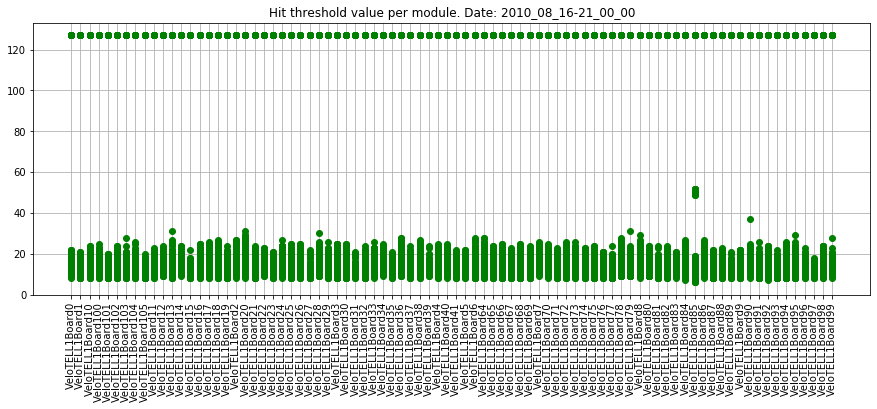

In [25]:
data2 = pd.DataFrame()
data = pd.read_csv(data_filesT[0] ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
data = data[data[0].str.contains("hit_threshold")]
data2 = data.loc[:, 2:2306]

data2.index = module_names()
data2.columns = range(2304)

fig, ax = plt.subplots()
ax.set_title('Hit threshold value per module. Date: 2010_08_16-21_00_00')
    
for i in range(len(data2.columns)):
    ax.plot(data2.index, data2[i], 'go')
    
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

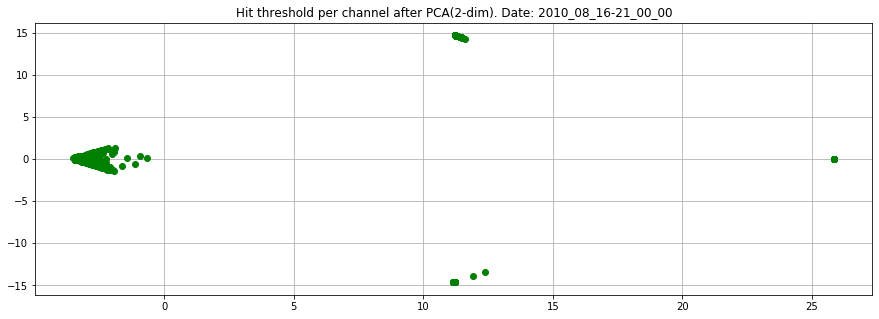

In [5]:
data_PCA = data2.T

x = data_PCA.loc[:, module_names()].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Hit threshold per channel after PCA(2-dim). Date: 2010_08_16-21_00_00')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'go')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

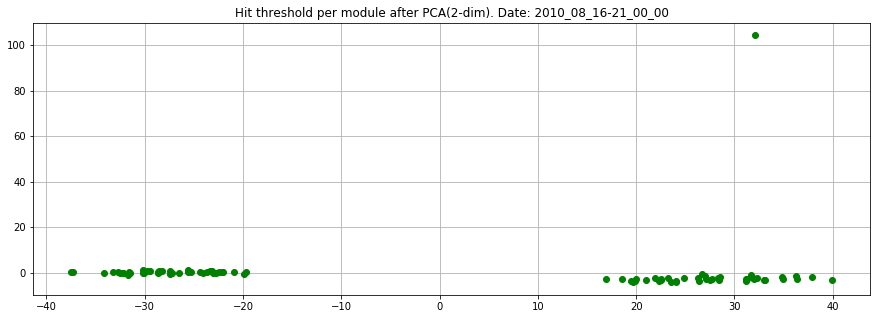

In [6]:
data_PCA = data2

x = data_PCA.loc[:, range(2048)].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Hit threshold per module after PCA(2-dim). Date: 2010_08_16-21_00_00')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'go')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [7]:
j_d = pd.DataFrame()
for file in data_filesT:
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    j_d = pd.concat([j_d, data.loc[:, 2:2306]], axis=1)
    #joined_data = joined_data.append(data.loc[:, 2:2049], ignore_index=True)
    
j_d.index = module_names()
j_d.columns = range(101376)

# Cała kalibracja

Złączono wszystkie dane kalibracyjne (hit trasholds) w jedną bazę danych i przeanalizowano:
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na kanały.
  Dalej kształtują się cztery klastry. W dalszej części zbadane zostanie co to za elementy wchodzą w odpowiednie klastry.
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na moduły.
  Dalej kształtują się dwa klastry. W dalszej części zbadane zostanie co to za elementy wchodzą w odpowiednie klastry.

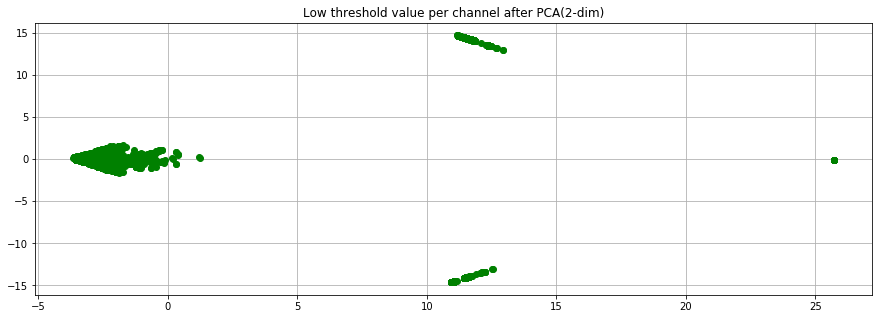

In [8]:
data_PCA = j_d.T
x = data_PCA.loc[:, module_names()].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Low threshold value per channel after PCA(2-dim)')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'go')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

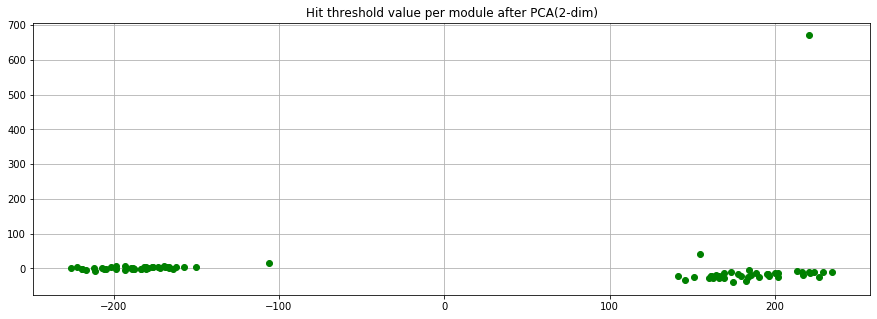

In [9]:
data_PCA = j_d

x = data_PCA.loc[:, range(101376)].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Hit threshold value per module after PCA(2-dim)')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'go')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

# Analiza klastrów dla wszystkich kalibracji

Dla każdej kalibracji oddzielnie sprawdzono, które z kanałów są elementami danego klastra:
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na kanały.
- zbierano informacje, które z kanałów należą do odpowiedniego klastra.

Elementy, które wchodzą w dane klastry wypisano w tabeli pod wykresem. Numery kanałów w danym klastrze są identyczne jak te w badaniu low thasholdów. Rórznią się tylko liczbą ich występowania.

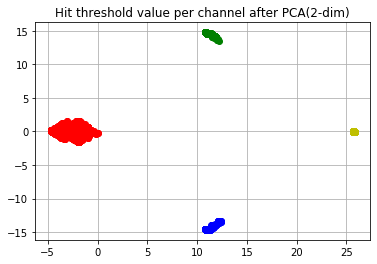

In [4]:
fig, ax = plt.subplots()
sensor_numbersR = []
sensor_numbersG = []
sensor_numbersB = []
sensor_numbersY = []
for file in data_filesT:
    #print(file)
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_PCA = data2.T

    x = data_PCA.loc[:, module_names()].values
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    #print(principalDf)

    ax.set_title('Hit threshold value per channel after PCA(2-dim)')

    for i in principalDf.index:
        if principalDf['pc1'][i] < 5:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'ro')
            sensor_numbersR.append(i)
        elif principalDf['pc1'][i] > 20:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'yo')
            sensor_numbersY.append(i)
        elif principalDf['pc2'][i] > 10:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'go')
            sensor_numbersG.append(i)
        else:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'bo')
            sensor_numbersB.append(i)
    
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()
#print(sensor_numbers)

In [5]:
print("Red elements {:>29} {:>25} {:>25}".format("Yellow elements", "Green elements", "Blue elements"))
print("[channel number, amount] {:>26} {:>26} {:>26}".format("[channel number, amount]", "[channel number, amount]", "[channel number, amount]"))
snR = [[x,sensor_numbersR.count(x)] for x in set(sensor_numbersR)]
snG = [[x,sensor_numbersG.count(x)] for x in set(sensor_numbersG)]
snB = [[x,sensor_numbersB.count(x)] for x in set(sensor_numbersB)]
snY = [[x,sensor_numbersY.count(x)] for x in set(sensor_numbersY)]
maxR = len(snR)
maxG = len(snG)
maxB = len(snB)
maxY = len(snY)

for i in range(maxR):
    if i < maxG:
        print("[{:>14}, {:>6}]   [{:>14}, {:>6}]   [{:>14}, {:>6}]   [{:>14}, {:>6}]".format(snR[i][0], snR[i][1], snY[i][0], snY[i][1], snG[i][0], snG[i][1], snB[i][0], snB[i][1]))
    elif i >= maxG and i < maxY:
        print("[{:>14}, {:>6}]   [{:>14}, {:>6}]".format(snR[i][0], snR[i][1], snY[i][0], snY[i][1]))
    elif i >= maxY and (i < maxY + 10):
        print("[{:>14}, {:>6}]".format(snR[i][0], snR[i][1]))
print("[       .....          ]")

Red elements               Yellow elements            Green elements             Blue elements
[channel number, amount]   [channel number, amount]   [channel number, amount]   [channel number, amount]
[             0,     44]   [           533,     44]   [           512,     41]   [           512,      3]
[             1,     44]   [           534,     44]   [           513,     41]   [           513,      3]
[             2,     44]   [           535,     44]   [           514,     41]   [           514,      3]
[             3,     44]   [           536,     44]   [           515,     41]   [           515,      3]
[             4,     44]   [           537,     44]   [           516,     41]   [           516,      3]
[             5,     44]   [           538,     44]   [           517,     41]   [           517,      3]
[             6,     44]   [           539,     44]   [           518,     41]   [           518,      3]
[             7,     44]   [           540,     44]   [  

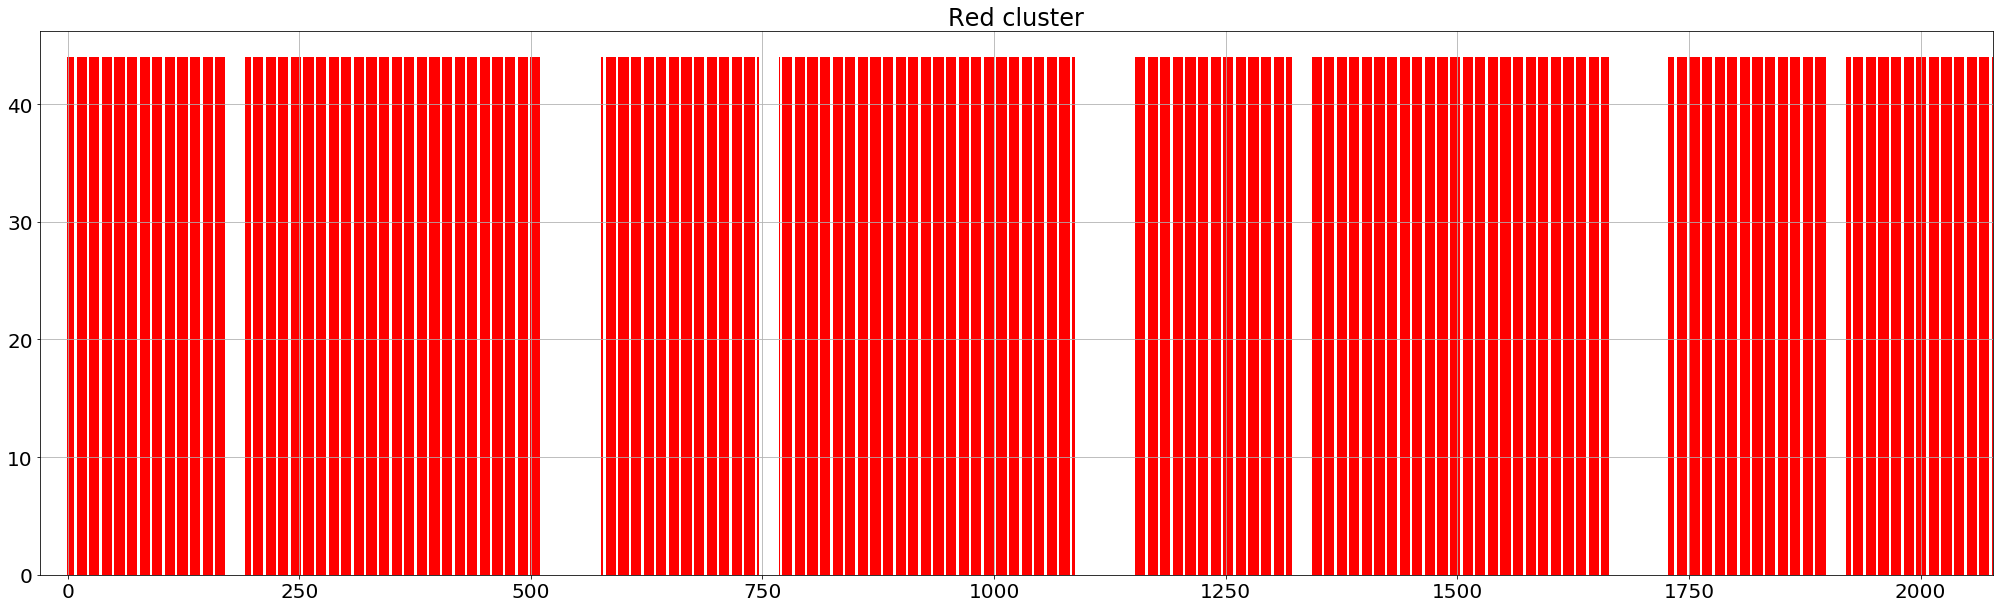

In [6]:
barData = pd.DataFrame.from_records(snR)

plt.rc('font', size=20)
plt.rcParams['figure.figsize'] = [35,10]
fig, ax = plt.subplots()

ax.set_title('Red cluster')  
ax.bar(barData[0], barData[1], color='r')
ax.set_xlim([-30, 2078])
ax.grid()

plt.show()

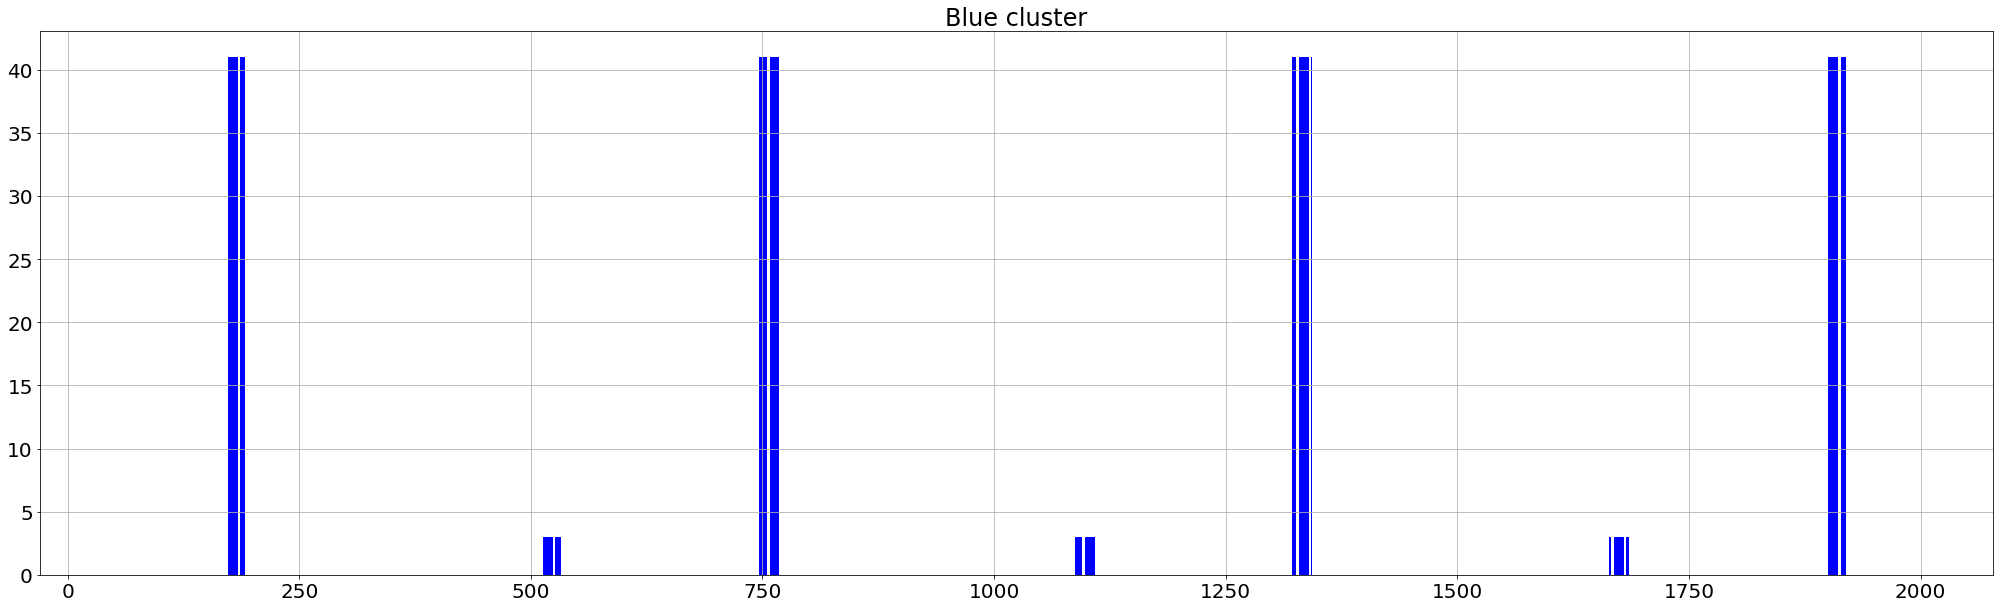

In [7]:
barData = pd.DataFrame.from_records(snB)

plt.rc('font', size=20)
plt.rcParams['figure.figsize'] = [35,10]
fig, ax = plt.subplots()

ax.set_title('Blue cluster')  
ax.bar(barData[0], barData[1], color='b')
ax.set_xlim([-30, 2078])
ax.grid()

plt.show()

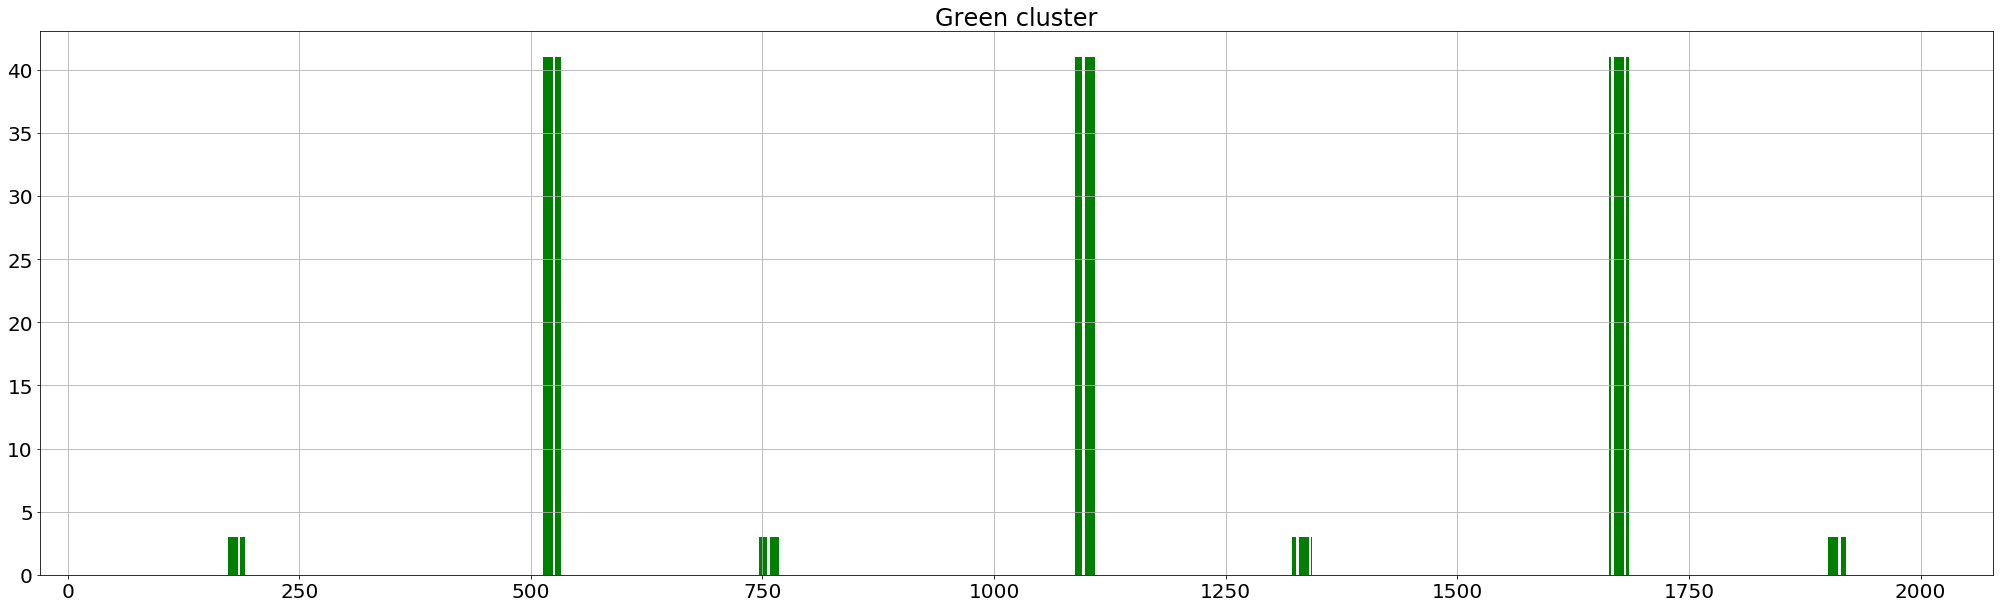

In [8]:
barData = pd.DataFrame.from_records(snG)

plt.rc('font', size=20)
plt.rcParams['figure.figsize'] = [35,10]
fig, ax = plt.subplots()

ax.set_title('Green cluster')  
ax.bar(barData[0], barData[1], color='g')
ax.set_xlim([-30, 2078])
ax.grid()

plt.show()

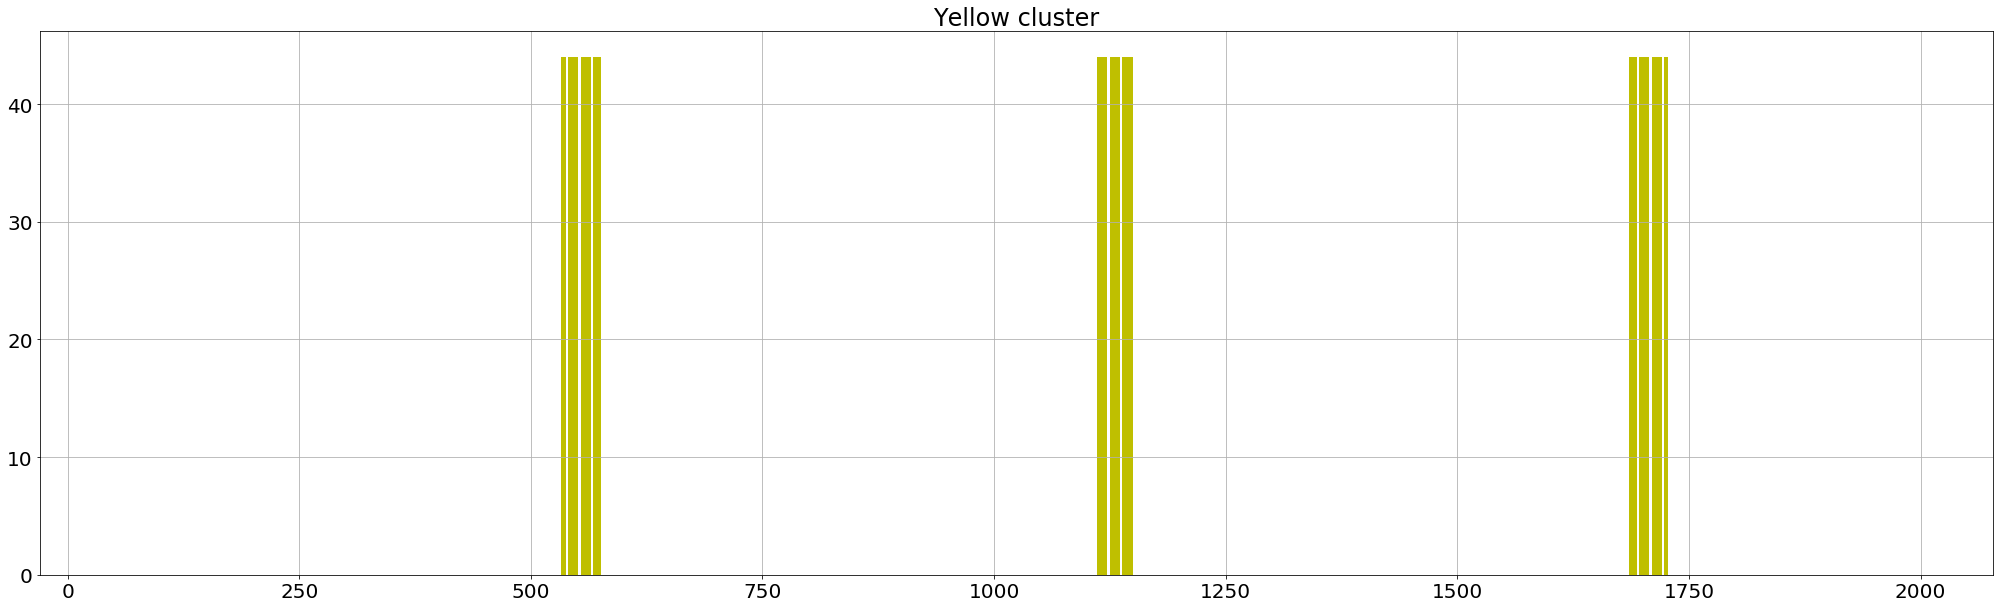

In [9]:
barData = pd.DataFrame.from_records(snY)

plt.rc('font', size=20)
plt.rcParams['figure.figsize'] = [35,10]
fig, ax = plt.subplots()

ax.set_title('Yellow cluster')  
ax.bar(barData[0], barData[1], color='y')
ax.set_xlim([-30, 2078])
ax.grid()

plt.show()

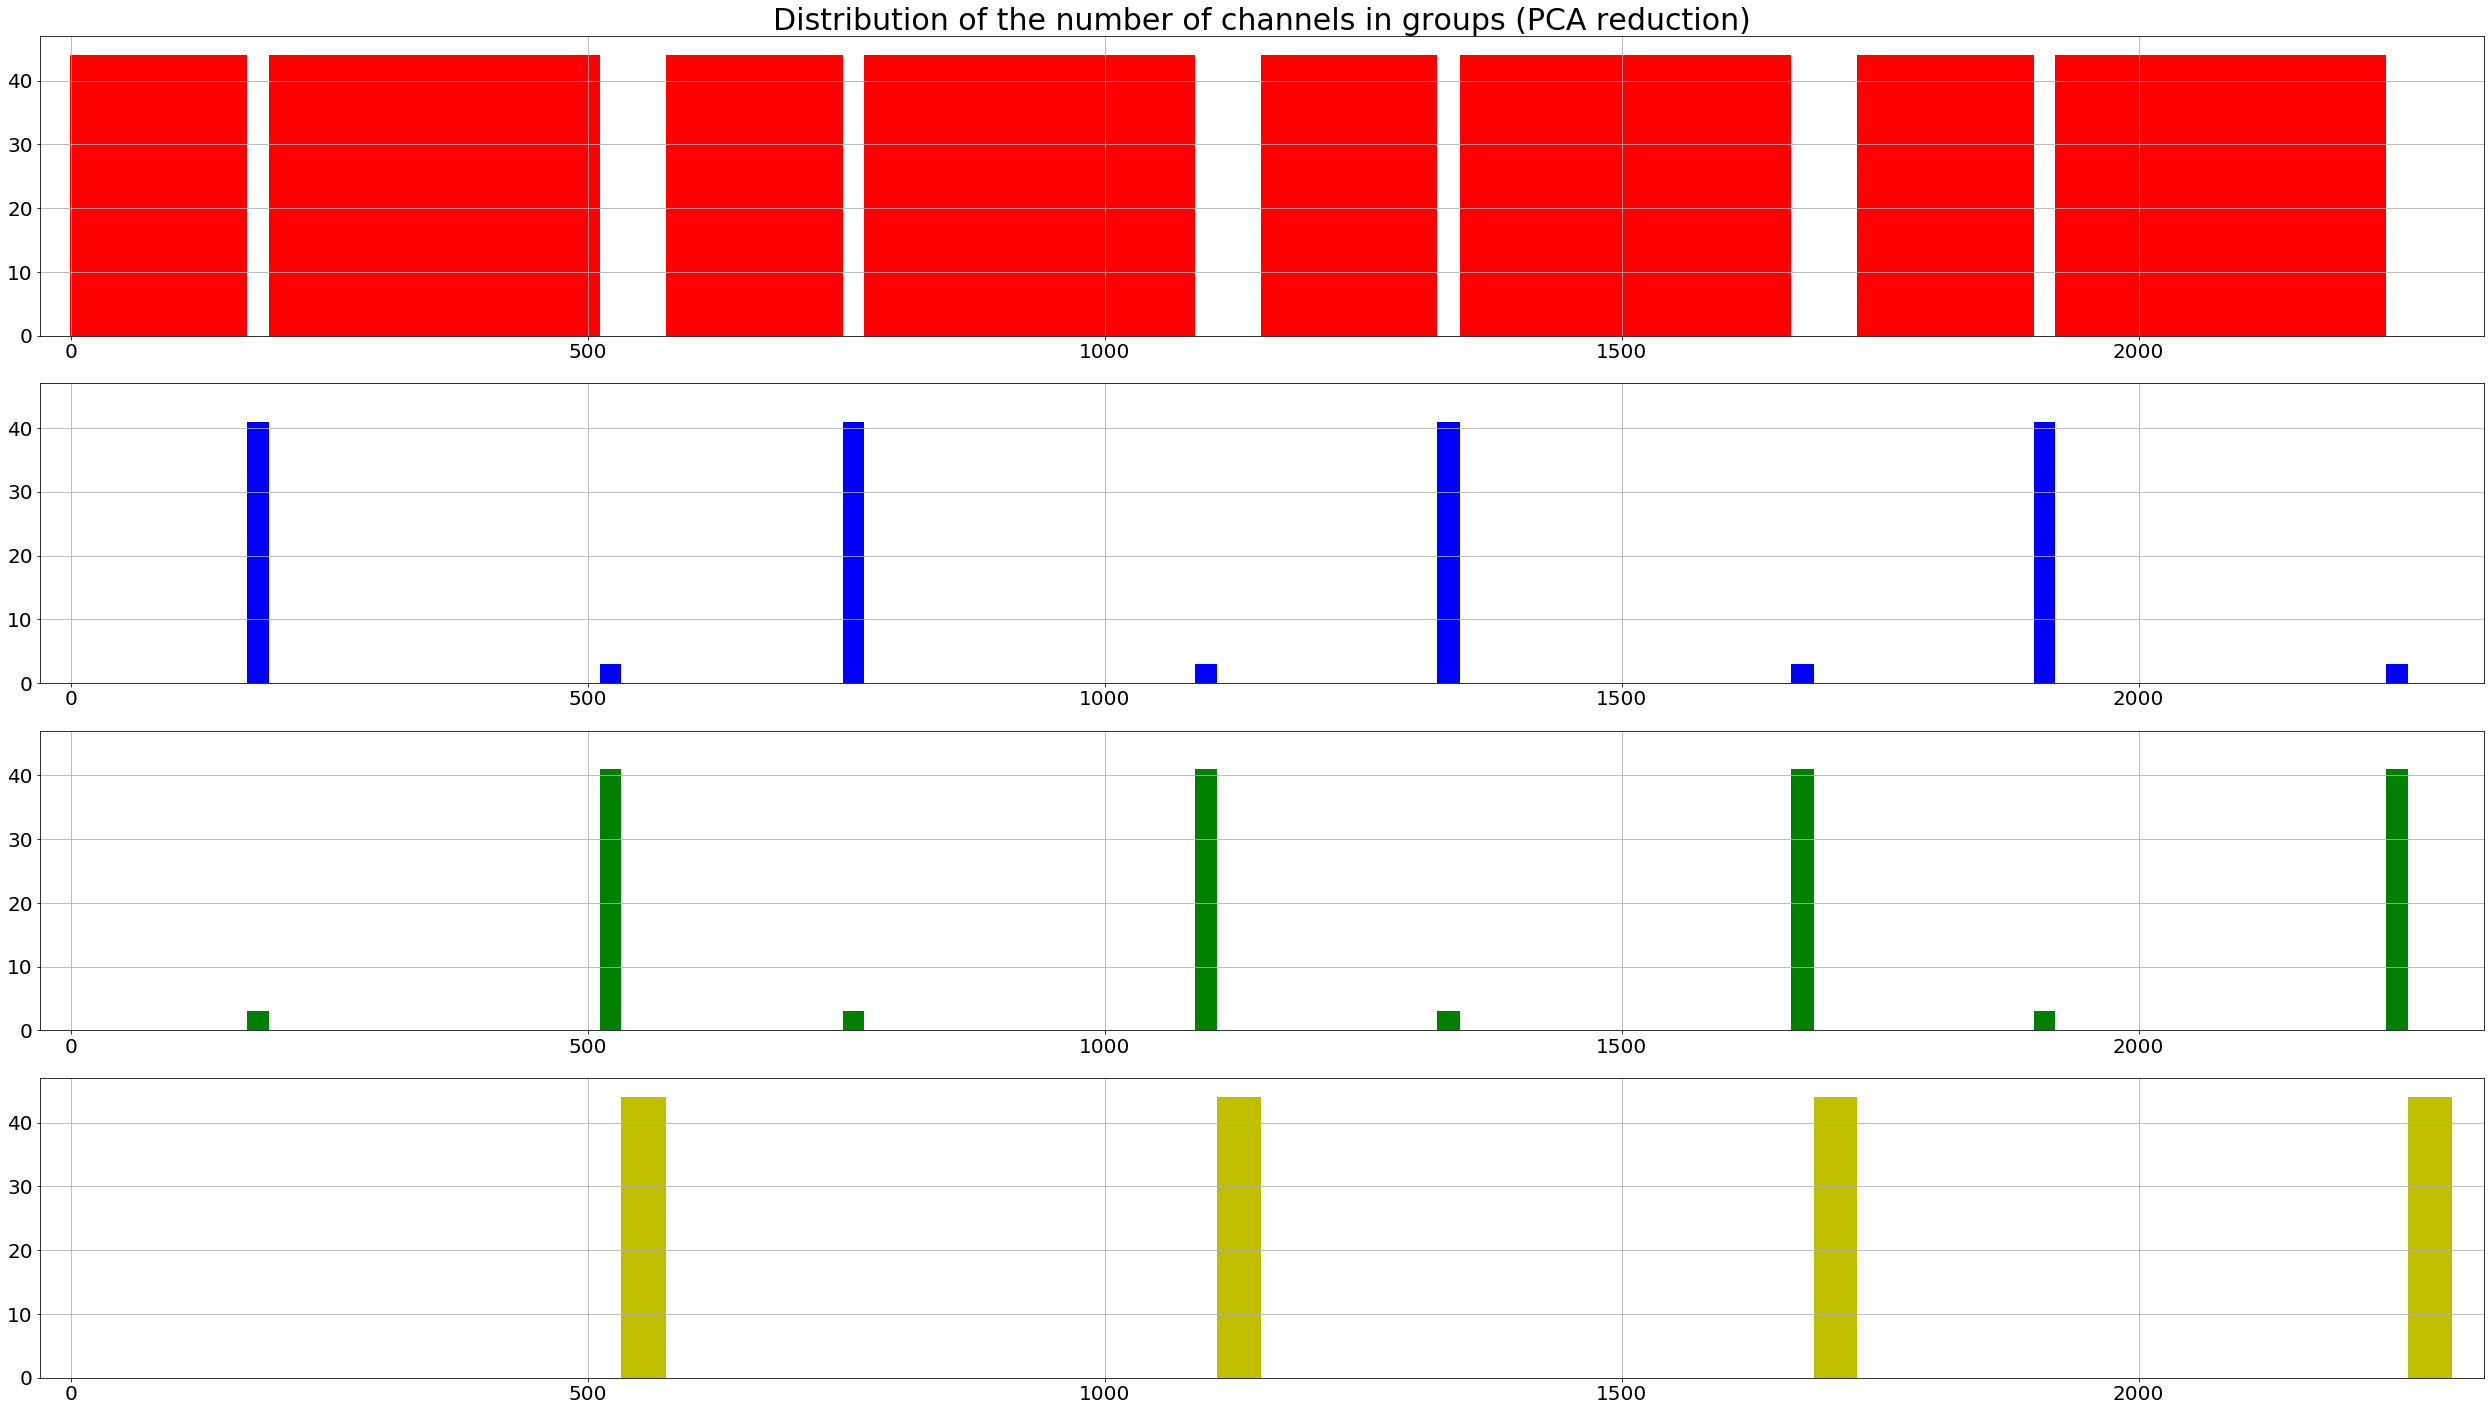

In [10]:
barDataR = pd.DataFrame.from_records(snR)
barDataG = pd.DataFrame.from_records(snG)
barDataB = pd.DataFrame.from_records(snB)
barDataY = pd.DataFrame.from_records(snY)

plt.rcParams['figure.figsize'] = [35,20]

plt.subplot(411)
plt.title("Distribution of the number of channels in groups (PCA reduction)", fontsize=30)
plt.bar(barDataR[0], barDataR[1], color='r', width=1)
plt.grid(True)
plt.xlim([-30, 2334])
plt.ylim([0, 47])

plt.subplot(412)
plt.bar(barDataB[0], barDataB[1], color='b', width=1)
plt.grid(True)
plt.xlim([-30, 2334])
plt.ylim([0, 47])

plt.subplot(413)
plt.bar(barDataG[0], barDataG[1], color='g', width=1)
plt.grid(True)
plt.xlim([-30, 2334])
plt.ylim([0, 47])

plt.subplot(414)
plt.bar(barDataY[0], barDataY[1], color='y', width=1)
plt.grid(True)
plt.xlim([-30, 2334])
plt.ylim([0, 47])

plt.tight_layout()
plt.savefig('pictures/hit_tresholds_groups_amount_all_modules_PCA.png')
plt.show()

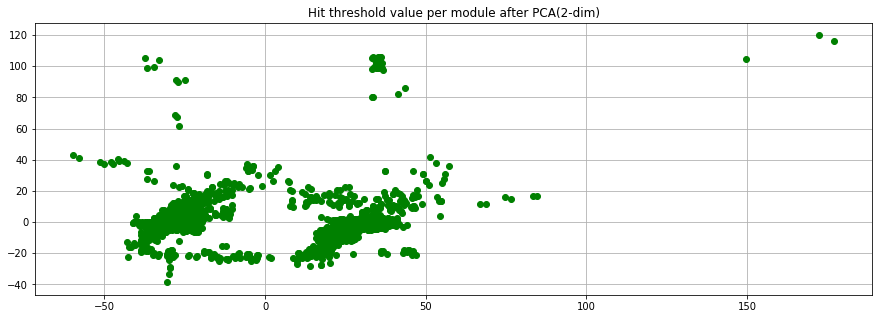

In [16]:
fig, ax = plt.subplots()
for file in data_filesT:
    #print(file)
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_PCA = data2

    x = data_PCA.loc[:, range(2304)].values
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    #print(principalDf)

    ax.set_title('Hit threshold value per module after PCA(2-dim)')

    for i in principalDf.index:
        ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'go')
    
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()
#print(sensor_numbers)

# Analiza danych dla wszystkich kalibracji w zależności od modułu

Dla każdej kalibracji oddzielnie sprawdzono, jak rozkładają się dane:
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na moduły.

Analogiczna sytuacja jak w badaniu low trasholdów.

In [17]:
'''
sensor_numbersB2 = []
sensor_numbersR2 = []
for file in data_filesT:
    #print(file)
    fig, ax = plt.subplots()
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("low_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_PCA = data2
    #print(data2.shape)
    x = data_PCA.loc[:, range(2304)].values
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    #print(principalDf)

    ax.set_title('Low threshold value per module after PCA(2-dim)')

    for i in principalDf.index:
        if principalDf['pc1'][i] < 0:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'ro')
            sensor_numbersR2.append(i)
        else:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'bo')
            sensor_numbersB2.append(i)
    
    plt.rcParams['figure.figsize'] = [15,5]
    ax.grid()
    plt.show()
#print(sensor_numbers)
'''

'\nsensor_numbersB2 = []\nsensor_numbersR2 = []\nfor file in data_filesT:\n    #print(file)\n    fig, ax = plt.subplots()\n    data2 = pd.DataFrame()\n    data = pd.read_csv(file ,sep=\' \', header=None, engine=\'python\', error_bad_lines=False, warn_bad_lines=False)\n    data = data[data[0].str.contains("low_threshold")]\n    data2 = data.loc[:, 2:2305]\n\n    data2.index = module_names()\n    data2.columns = range(2304)\n\n    data_PCA = data2\n    #print(data2.shape)\n    x = data_PCA.loc[:, range(2304)].values\n    x = StandardScaler().fit_transform(x)\n\n    pca = PCA(n_components=2)\n    principalComponents = pca.fit_transform(x)\n    principalDf = pd.DataFrame(data = principalComponents, columns = [\'pc1\', \'pc2\'])\n    #print(principalDf)\n\n    ax.set_title(\'Low threshold value per module after PCA(2-dim)\')\n\n    for i in principalDf.index:\n        if principalDf[\'pc1\'][i] < 0:\n            ax.plot(principalDf[\'pc1\'][i], principalDf[\'pc2\'][i], \'ro\')\n            

In [12]:
map_data_path = "../module_mapping.csv"
map_data = pd.read_csv(map_data_path ,sep=' ', engine='python', index_col=False)
map_data_R = map_data[map_data["sensor_type"] == "R"].sort_values(by=['sensor_number'])
map_data_Phi = map_data[map_data["sensor_type"] == "phi"].sort_values(by=['sensor_number'])

r_sensors_numbers = map_data_R["sensor_number"][0:42].tolist()
phi_sensors_numbers = map_data_Phi["sensor_number"].tolist()

r_sensors_names = []
for i in r_sensors_numbers:
    r_sensors_names.append("VeloTELL1Board" + str(i))

phi_sensors_names = []
for i in phi_sensors_numbers:
    phi_sensors_names.append("VeloTELL1Board" + str(i))

# Analiza hit trasholdów dla wszystkich kalibracji w zależności od kanału dla modułów typu R

Dla każdej kalibracji oddzielnie sprawdzono, jak rozkładają się dane:
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na kanały.

Widać, że dane rozdzieliły się na dwie części. Analogicznie jak dla analiy low trresholdów. Elementy z niebieskiej grupy wyświetlono pod wykresem.

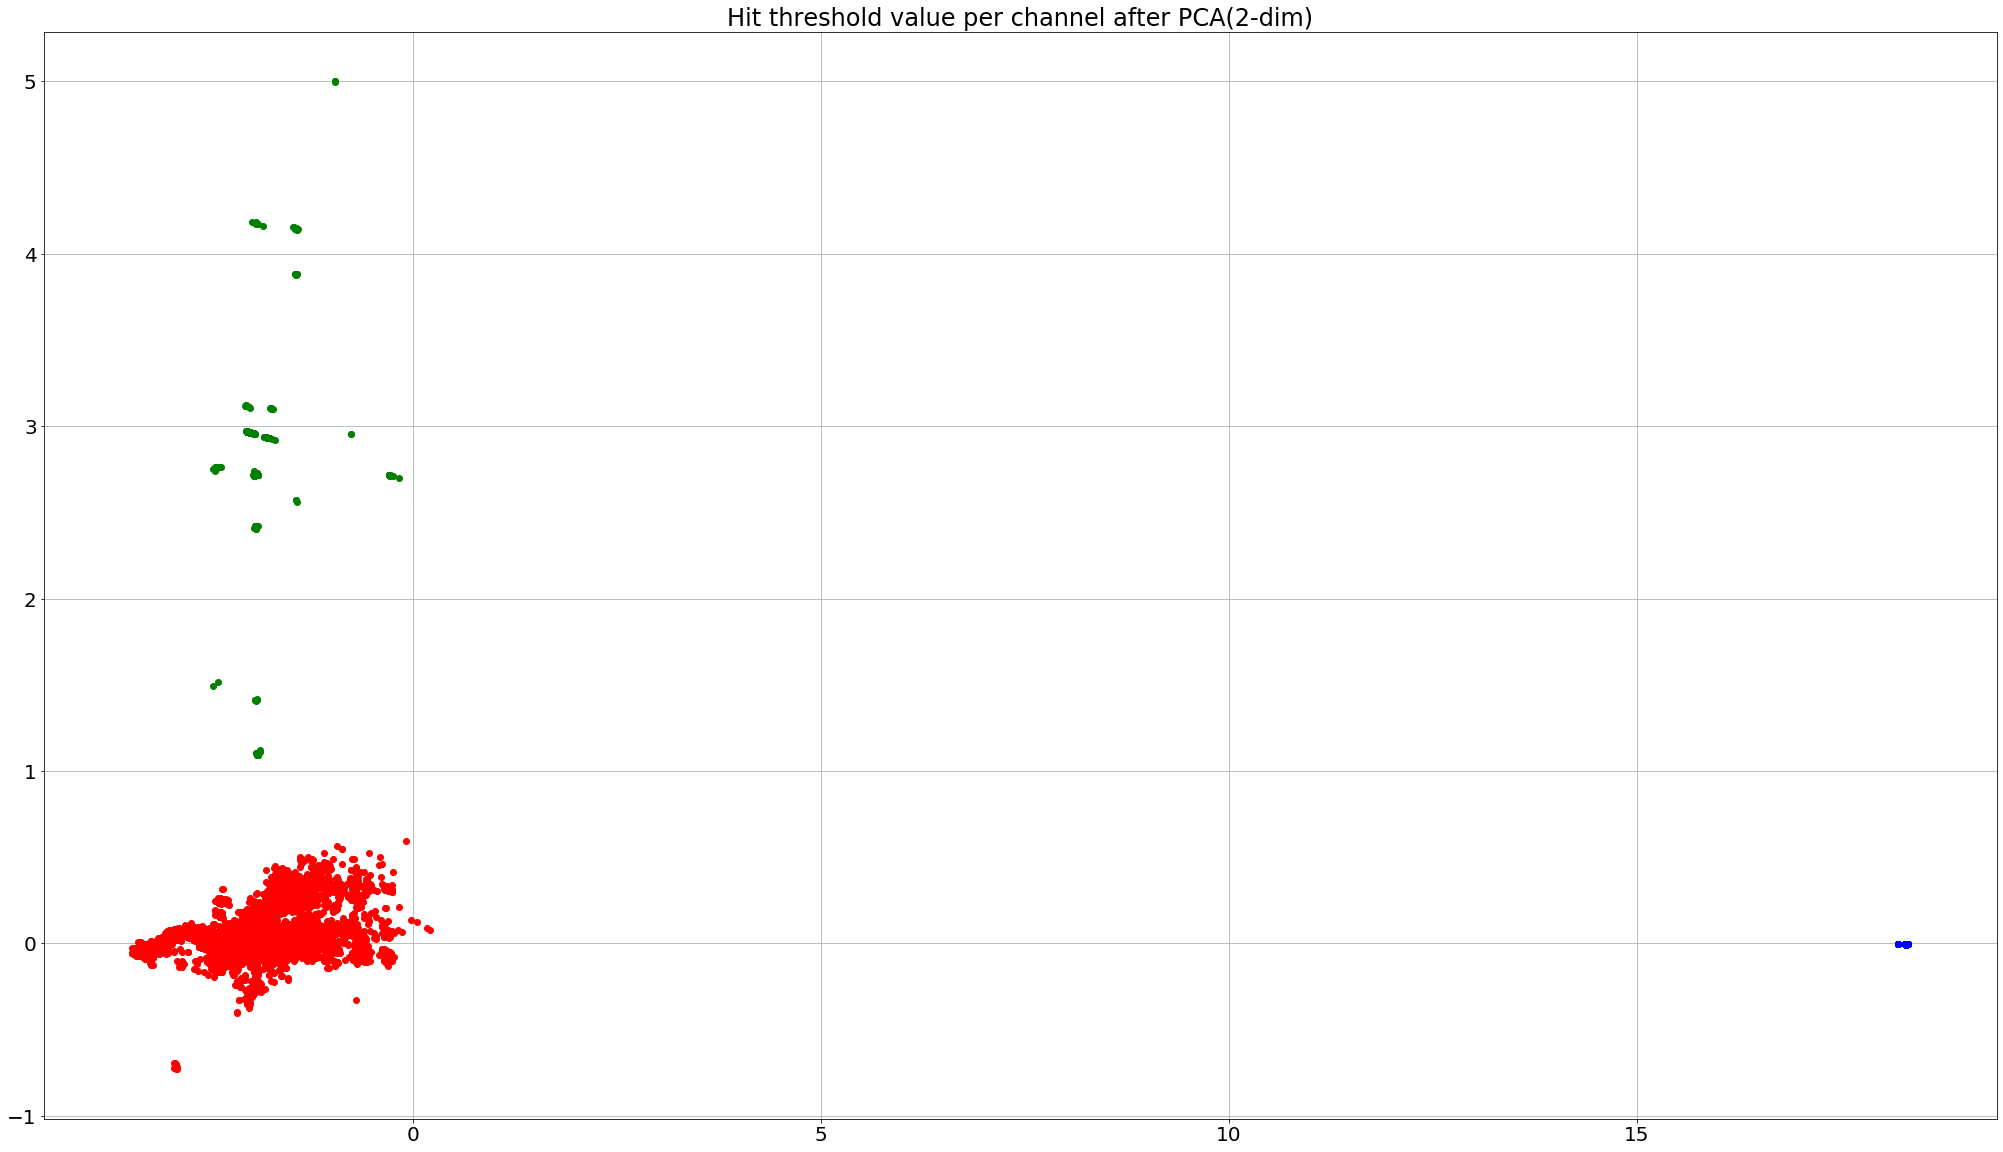

In [13]:
fig, ax = plt.subplots()
sensor_numbersR_r_chanels = []
sensor_numbersB_r_chanels = []
sensor_numbersG_r_chanels = []
for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data.index = [i for i in range(84)]
    data = data[pd.DataFrame(data[1].tolist()).isin(r_sensors_names).any(1)]
    names = data[1].tolist()
    data2 = data.loc[:, 2:2305]

    data2.index = names
    data2.columns = range(2304)

    data_PCA = data2.T

    x = data_PCA.loc[:, names].values
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    #print(principalDf)

    ax.set_title('Hit threshold value per channel after PCA(2-dim)')

    for i in principalDf.index:
        if principalDf['pc1'][i] < 5:
            if principalDf['pc2'][i] < 1:
                ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'ro')
                sensor_numbersR_r_chanels.append(i)
            else:
                ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'go')
                sensor_numbersG_r_chanels.append(i)    
        else:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'bo')
            sensor_numbersB_r_chanels.append(i)
    
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()
#print(sensor_numbers)

In [14]:
print("Blue elements")
print("[channel number, amount]")
snR = [[x,sensor_numbersR_r_chanels.count(x)] for x in set(sensor_numbersR_r_chanels)]
snB = [[x,sensor_numbersB_r_chanels.count(x)] for x in set(sensor_numbersB_r_chanels)]
snG = [[x,sensor_numbersG_r_chanels.count(x)] for x in set(sensor_numbersG_r_chanels)]
maxR = len(snR)
maxB = len(snB)
for i in range(maxB):
    print("[{:>14}, {:>6}]".format(snB[i][0], snB[i][1]))

print("")
print("Red elements amount:")
print(maxR)

Blue elements
[channel number, amount]
[           512,     44]
[           513,     44]
[           514,     44]
[           515,     44]
[           516,     44]
[           517,     44]
[           518,     44]
[           519,     44]
[           520,     44]
[           521,     44]
[           522,     44]
[           523,     44]
[           524,     44]
[           525,     44]
[           526,     44]
[           527,     44]
[           528,     44]
[           529,     44]
[           530,     44]
[           531,     44]
[           532,     44]
[           533,     44]
[           534,     44]
[           535,     44]
[           536,     44]
[           537,     44]
[           538,     44]
[           539,     44]
[           540,     44]
[           541,     44]
[           542,     44]
[           543,     44]
[           544,     44]
[           545,     44]
[           546,     44]
[           547,     44]
[           548,     44]
[           549,     44]
[          

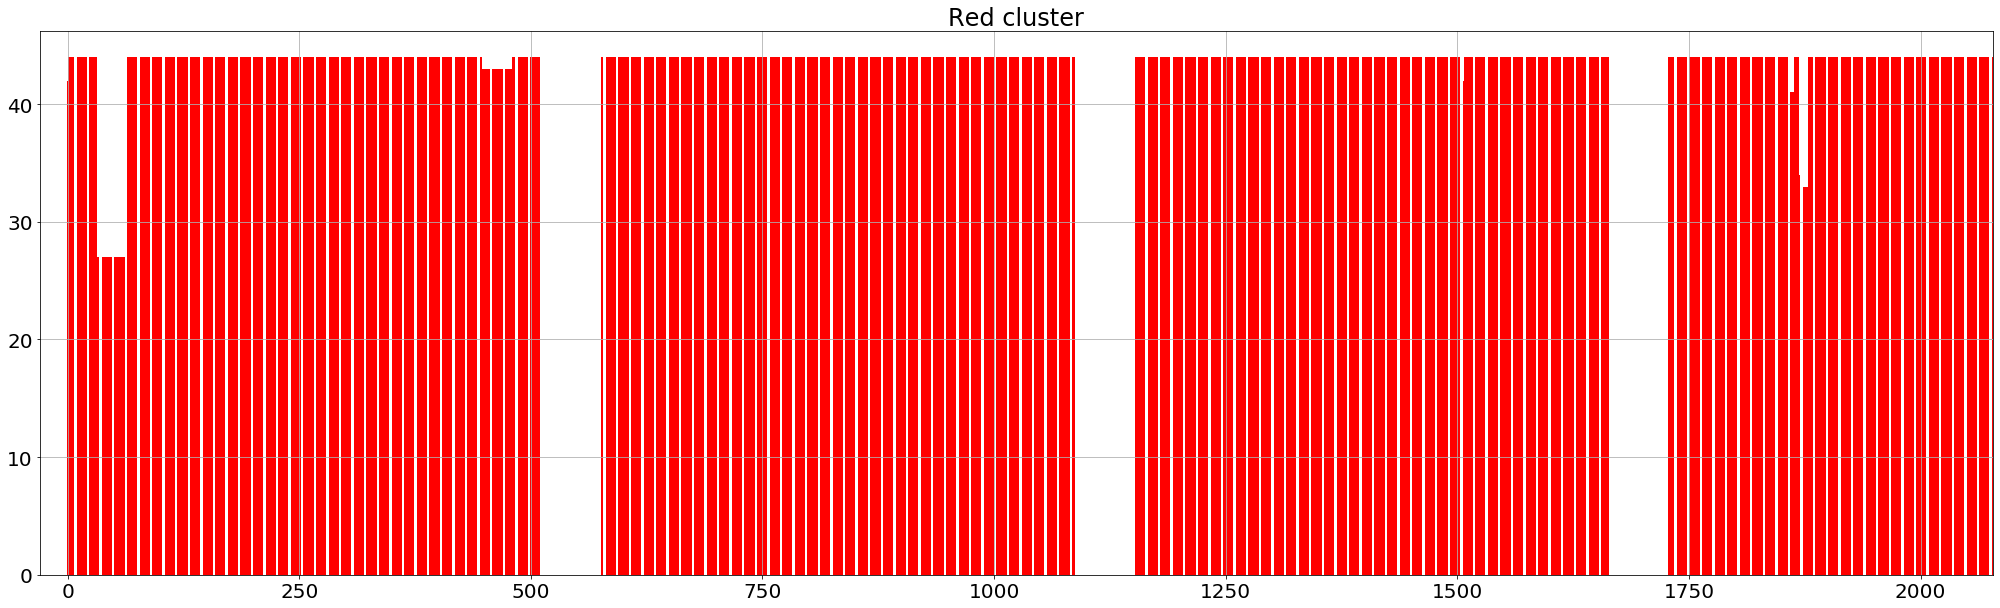

In [15]:
barData = pd.DataFrame.from_records(snR)

plt.rc('font', size=20)
plt.rcParams['figure.figsize'] = [35,10]
fig, ax = plt.subplots()

ax.set_title('Red cluster')  
ax.bar(barData[0], barData[1], color='r')
ax.set_xlim([-30, 2078])
ax.grid()

plt.show()

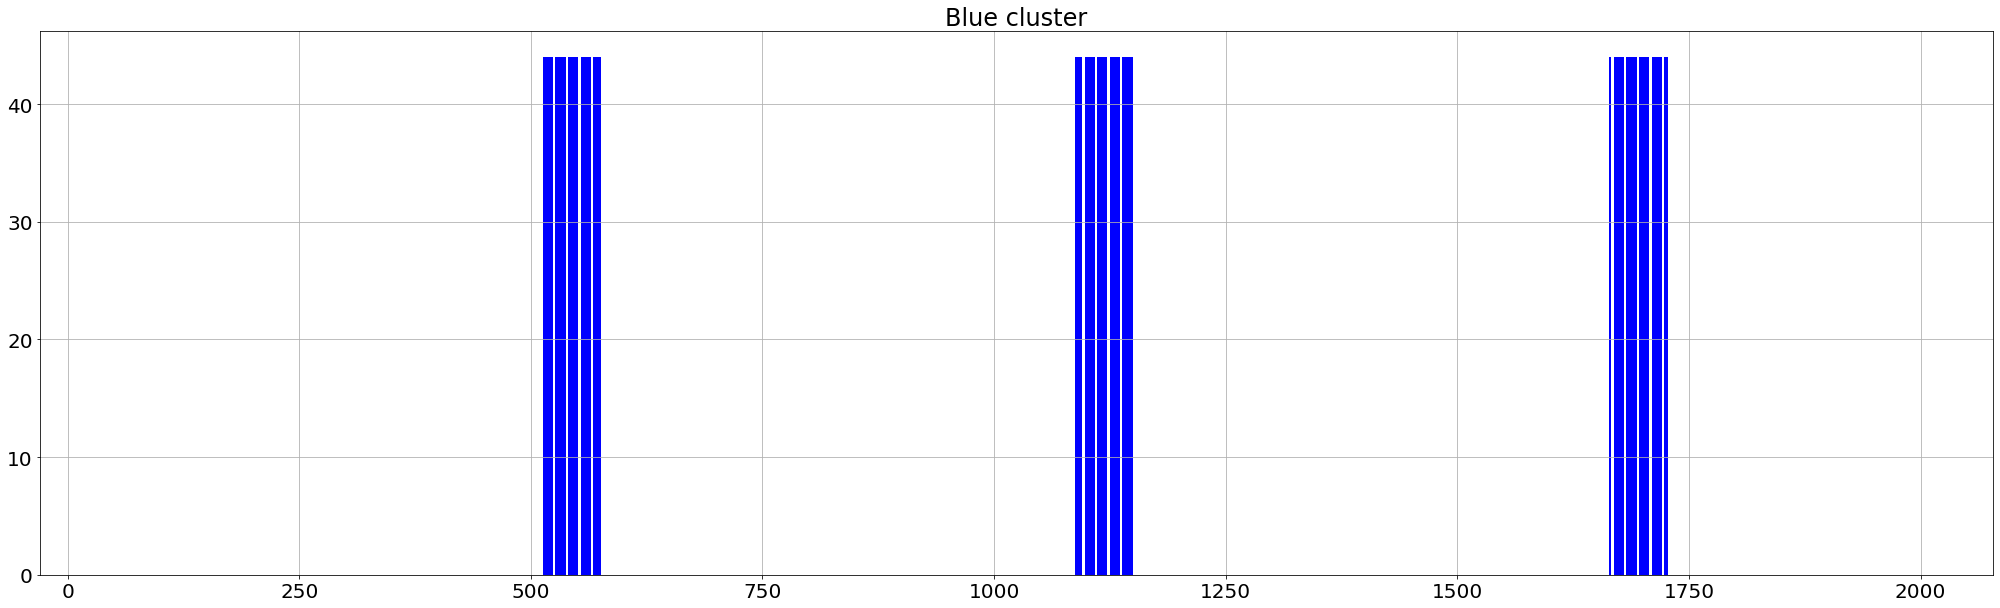

In [16]:
barData = pd.DataFrame.from_records(snB)

plt.rc('font', size=20)
plt.rcParams['figure.figsize'] = [35,10]
fig, ax = plt.subplots()

ax.set_title('Blue cluster')  
ax.bar(barData[0], barData[1], color='b')
ax.set_xlim([-30, 2078])
ax.grid()

plt.show()

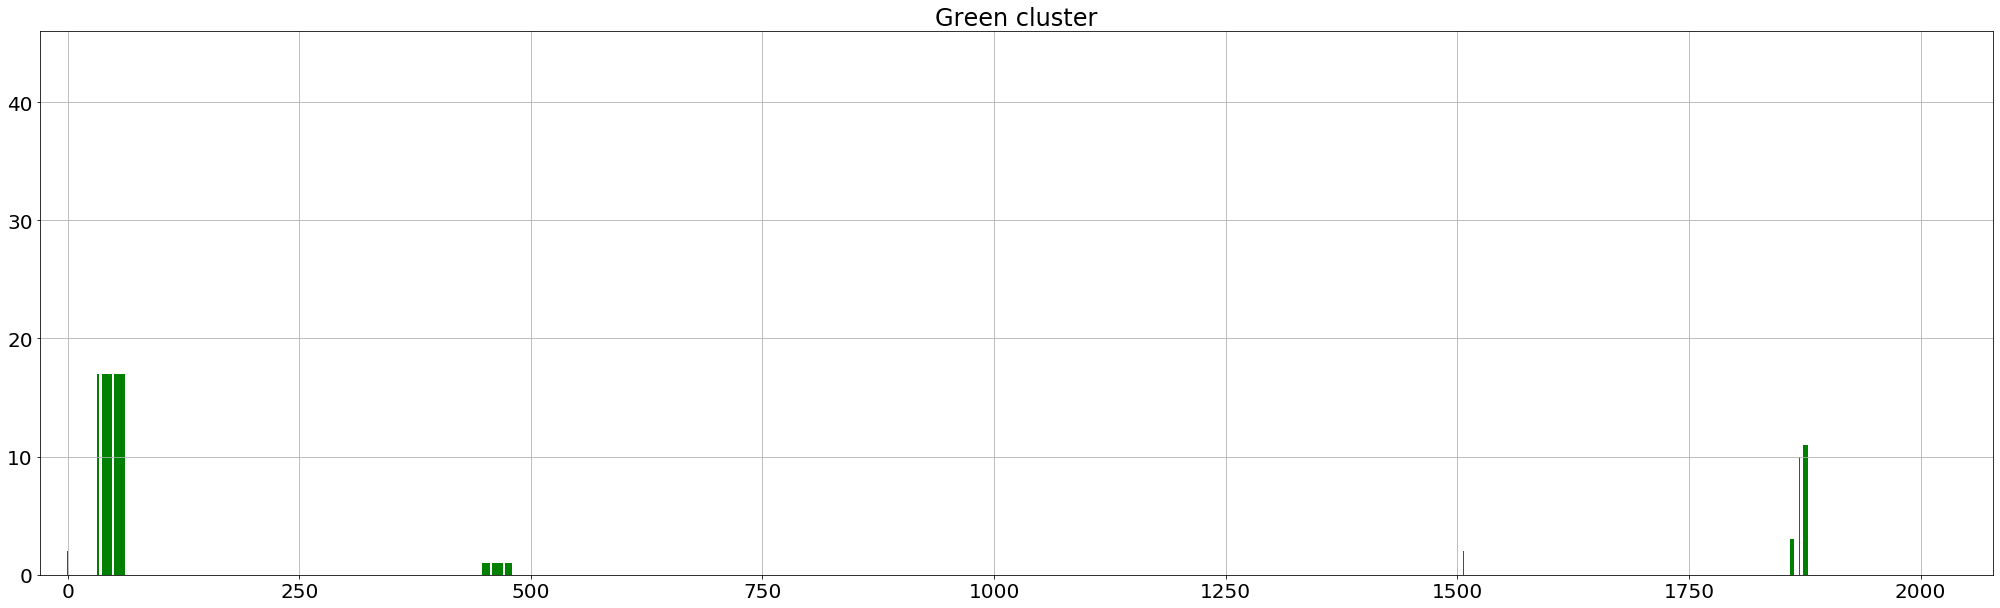

In [17]:
barData = pd.DataFrame.from_records(snG)

plt.rc('font', size=20)
plt.rcParams['figure.figsize'] = [35,10]
fig, ax = plt.subplots()

ax.set_title('Green cluster')  
ax.bar(barData[0], barData[1], color='g')
ax.set_xlim([-30, 2078])
ax.set_ylim([0,   46])
ax.grid()

plt.show()

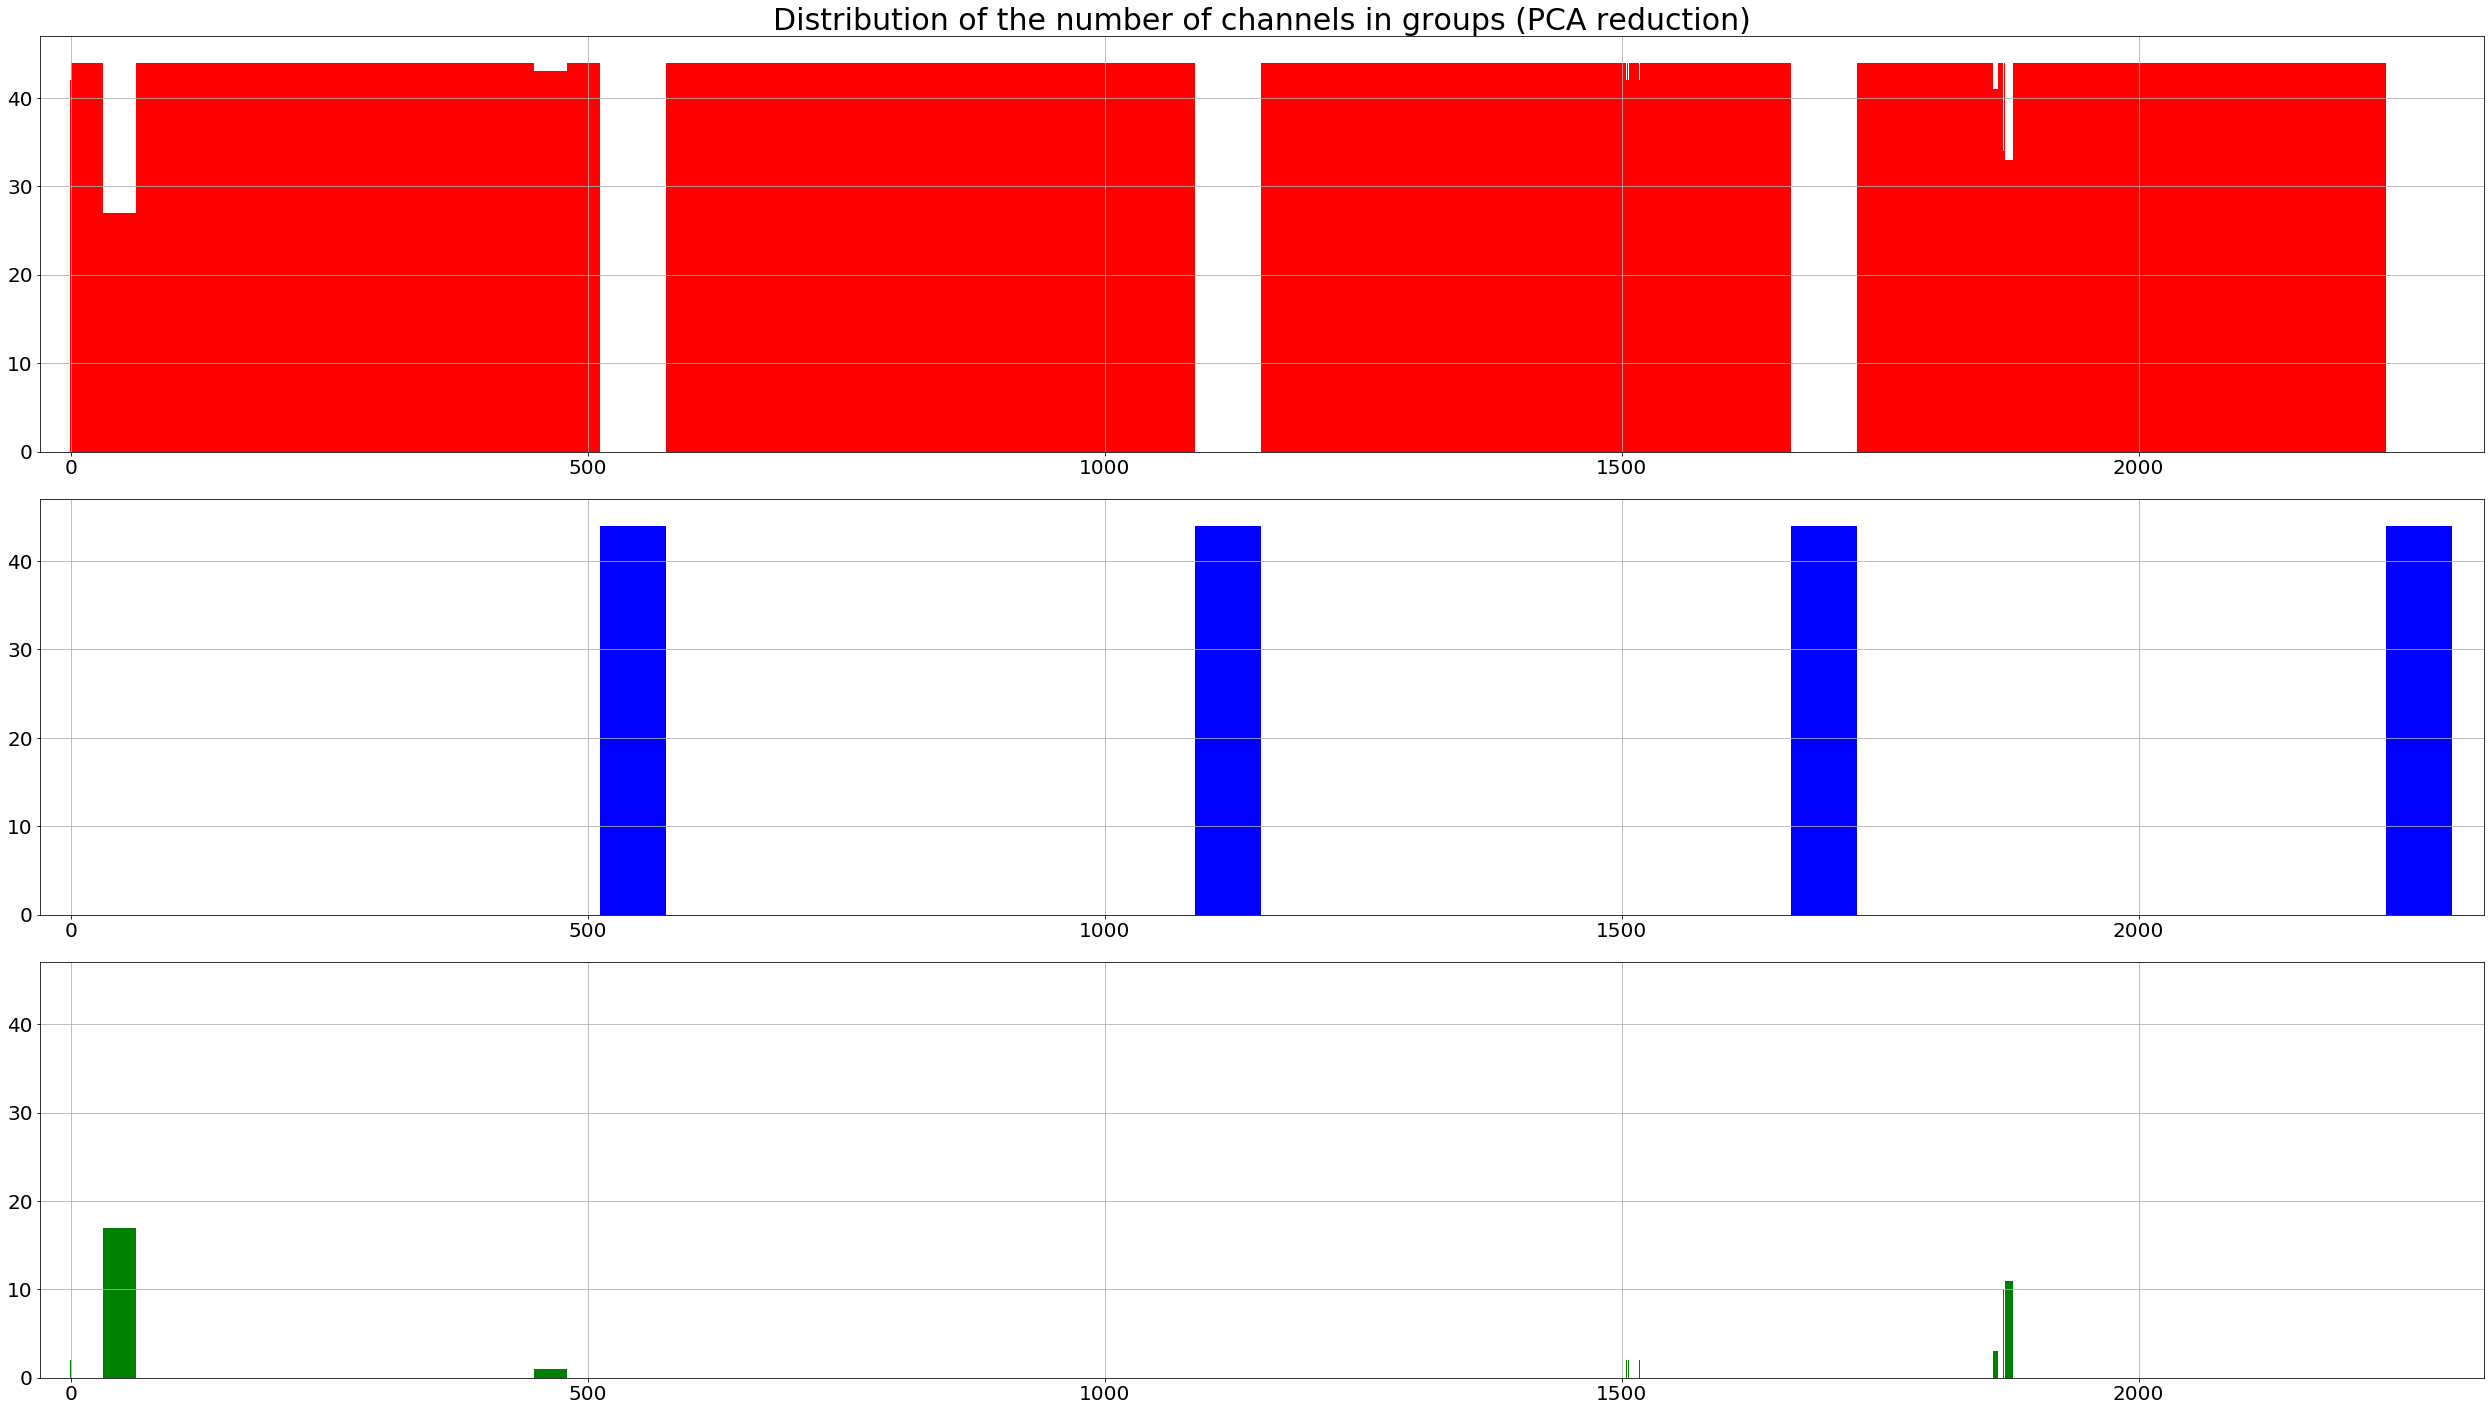

In [18]:
barDataR = pd.DataFrame.from_records(snR)
barDataG = pd.DataFrame.from_records(snG)
barDataB = pd.DataFrame.from_records(snB)

plt.rcParams['figure.figsize'] = [35,20]

plt.subplot(311)
plt.title("Distribution of the number of channels in groups (PCA reduction)", fontsize=30)
plt.bar(barDataR[0], barDataR[1], color='r', width=1)
plt.grid(True)
plt.xlim([-30, 2334])
plt.ylim([0, 47])

plt.subplot(312)
plt.bar(barDataB[0], barDataB[1], color='b', width=1)
plt.grid(True)
plt.xlim([-30, 2334])
plt.ylim([0, 47])

plt.subplot(313)
plt.bar(barDataG[0], barDataG[1], color='g', width=1)
plt.grid(True)
plt.xlim([-30, 2334])
plt.ylim([0, 47])

plt.tight_layout()
plt.savefig('pictures/hit_tresholds_groups_amount_R_modules_PCA.png')
plt.show()

# Analiza hit trasholdów dla wszystkich kalibracji w zależności od kanału dla modułów typu Phi

Dla każdej kalibracji oddzielnie sprawdzono, jak rozkładają się dane:
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na kanały.


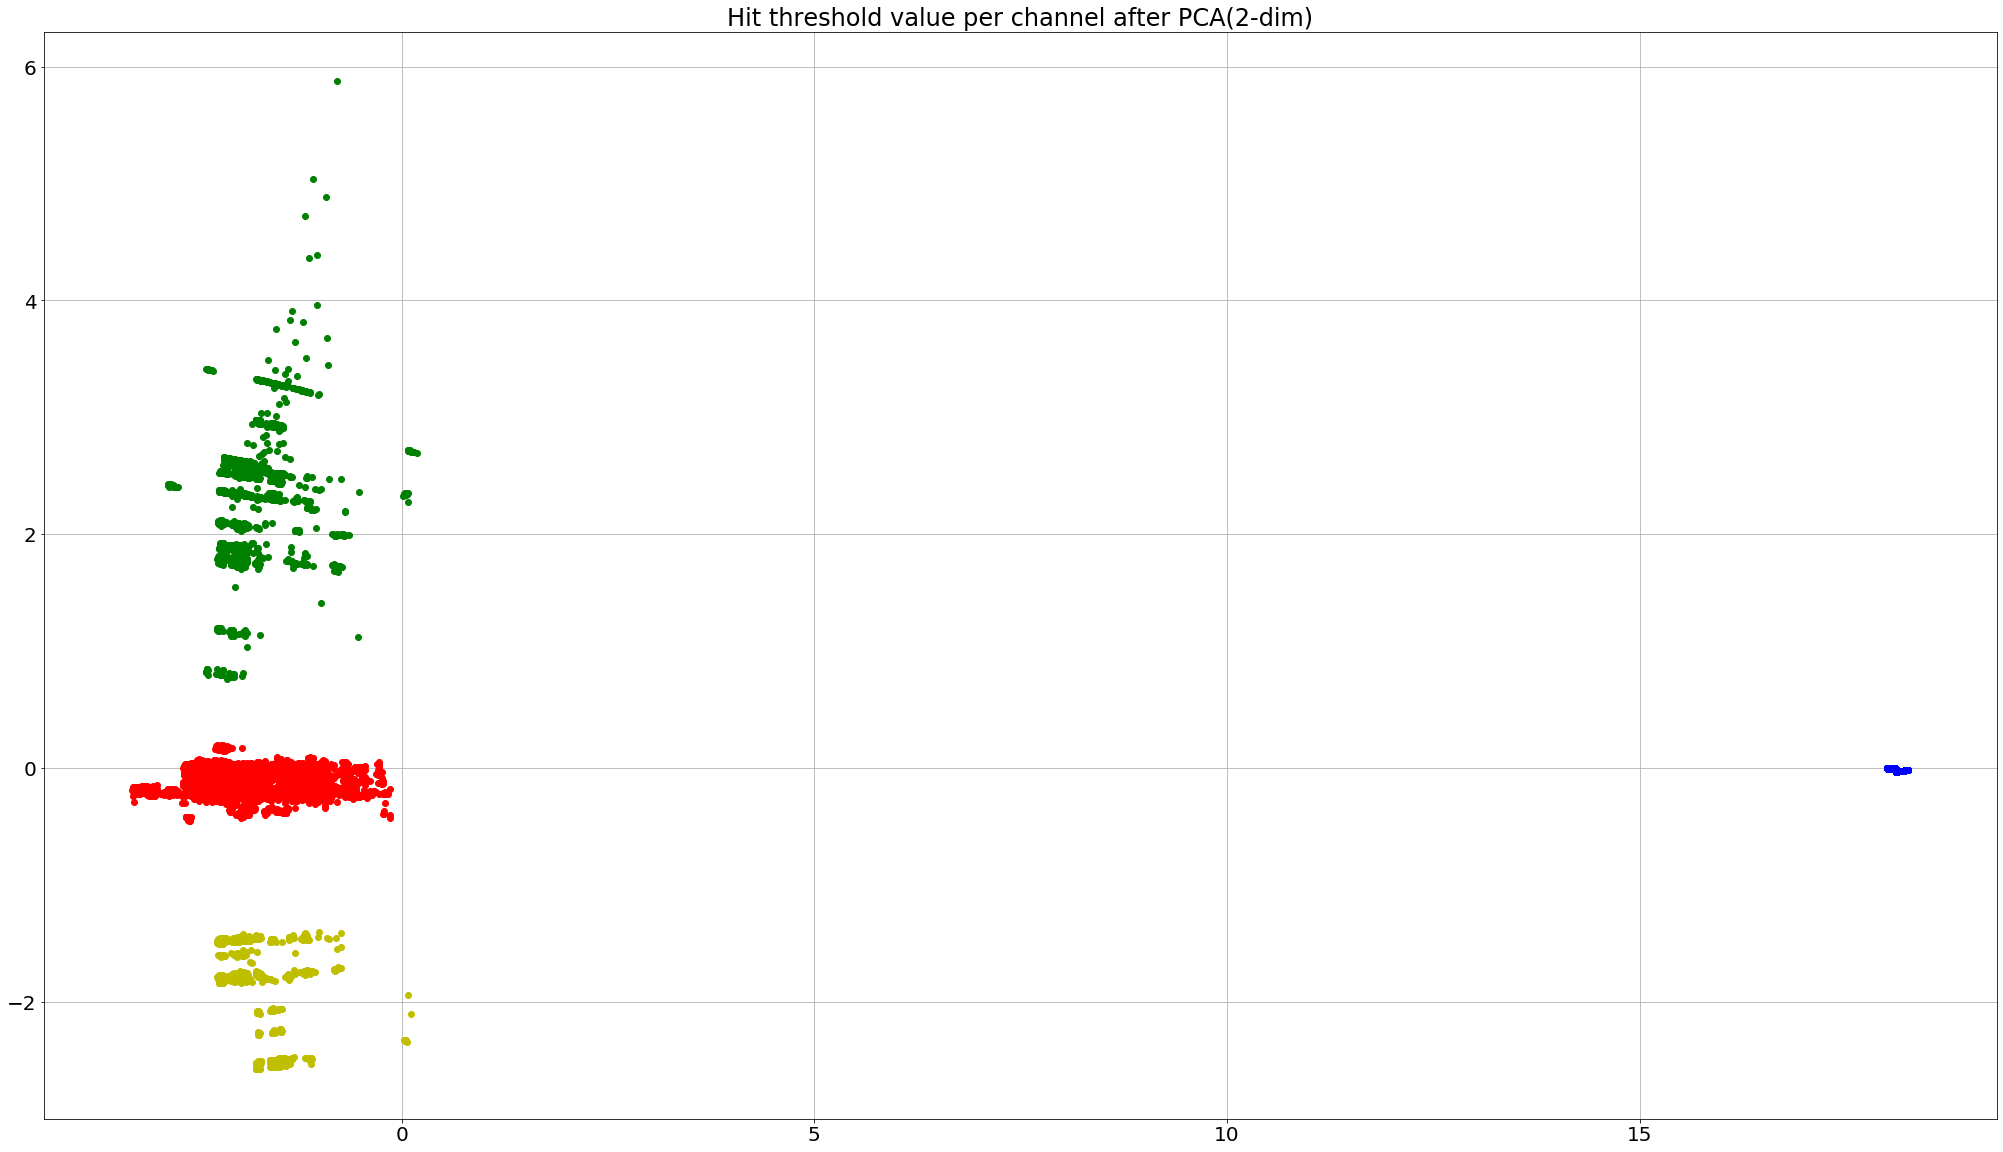

In [19]:
fig, ax = plt.subplots()
sensor_numbersR_phi_chanels = []
sensor_numbersB_phi_chanels = []
sensor_numbersG_phi_chanels = []
sensor_numbersY_phi_chanels = []
for file in data_filesT:
    #print(file)
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data.index = [i for i in range(84)]
    data = data[pd.DataFrame(data[1].tolist()).isin(phi_sensors_names).any(1)]
    names = data[1].tolist()
    data2 = data.loc[:, 2:2305]

    data2.index = names
    data2.columns = range(2304)

    data_PCA = data2.T

    x = data_PCA.loc[:, names].values
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    #print(principalDf)

    ax.set_title('Hit threshold value per channel after PCA(2-dim)')

    for i in principalDf.index:
        if principalDf['pc1'][i] < 5:
            if principalDf['pc2'][i] < -1:
                ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'yo')
                sensor_numbersY_phi_chanels.append(i)
            elif principalDf['pc2'][i] > 0.2:
                ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'go')
                sensor_numbersG_phi_chanels.append(i)
            else:
                ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'ro')
                sensor_numbersR_phi_chanels.append(i)
        else:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'bo')
            sensor_numbersB_phi_chanels.append(i)
    
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()
#print(sensor_numbers)

In [20]:
print("Blue elements")
print("[channel number, amount]")
snR = [[x,sensor_numbersR_phi_chanels.count(x)] for x in set(sensor_numbersR_phi_chanels)]
snB = [[x,sensor_numbersB_phi_chanels.count(x)] for x in set(sensor_numbersB_phi_chanels)]
snG = [[x,sensor_numbersG_phi_chanels.count(x)] for x in set(sensor_numbersG_phi_chanels)]
snY = [[x,sensor_numbersY_phi_chanels.count(x)] for x in set(sensor_numbersY_phi_chanels)]
maxR = len(snR)
maxB = len(snB)
for i in range(maxB):
    print("[{:>14}, {:>6}]".format(snB[i][0], snB[i][1]))

print("")
print("Red elements amount:")
print(maxR)

Blue elements
[channel number, amount]
[           533,     44]
[           534,     44]
[           535,     44]
[           536,     44]
[           537,     44]
[           538,     44]
[           539,     44]
[           540,     44]
[           541,     44]
[           542,     44]
[           543,     44]
[           544,     44]
[           545,     44]
[           546,     44]
[           547,     44]
[           548,     44]
[           549,     44]
[           550,     44]
[           551,     44]
[           552,     44]
[           553,     44]
[           554,     44]
[           555,     44]
[           556,     44]
[           557,     44]
[           558,     44]
[           559,     44]
[           560,     44]
[           561,     44]
[           562,     44]
[           563,     44]
[           564,     44]
[           565,     44]
[           566,     44]
[           567,     44]
[           568,     44]
[           569,     44]
[           570,     44]
[          

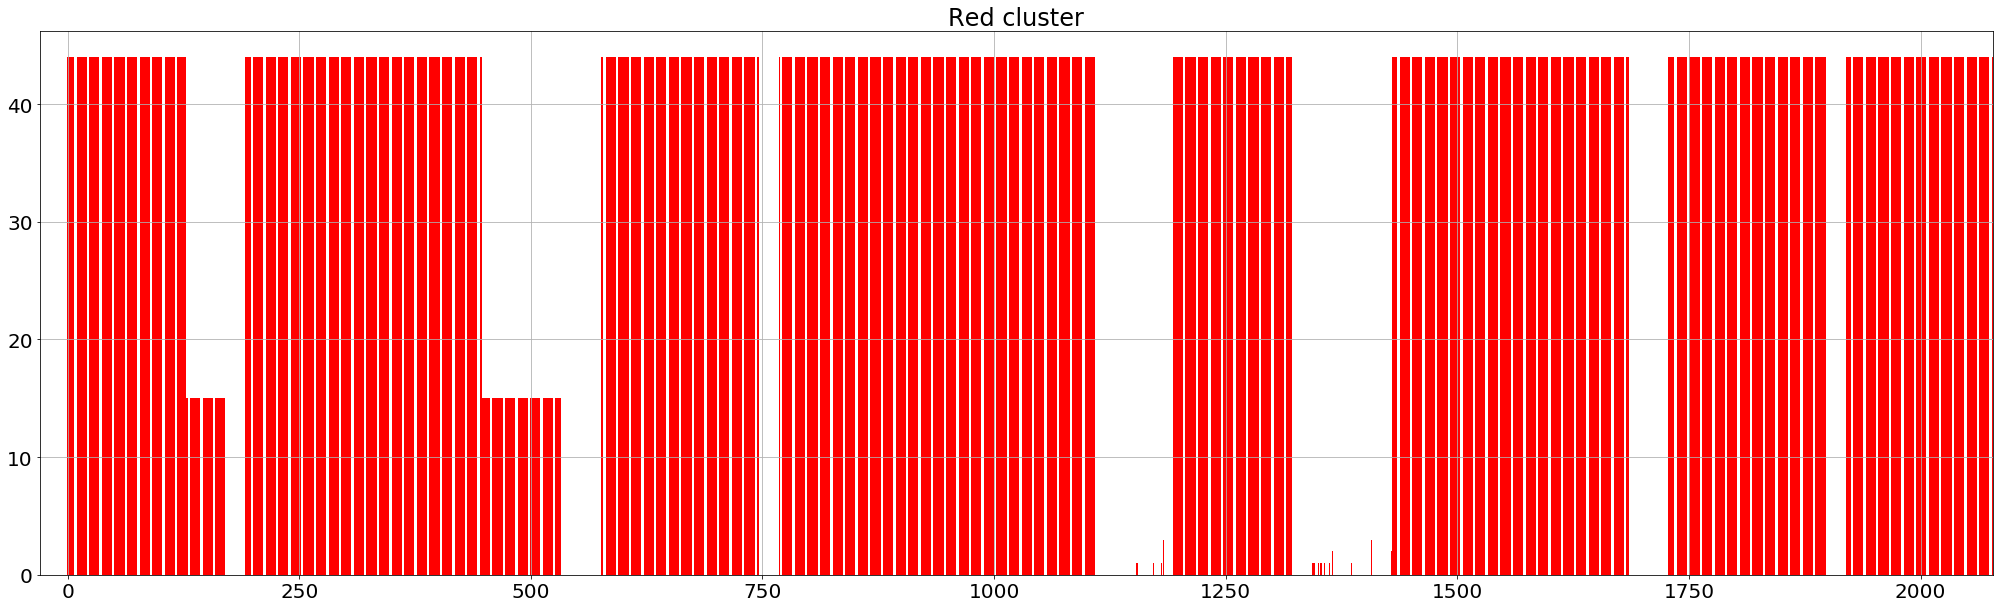

In [21]:
barData = pd.DataFrame.from_records(snR)

plt.rc('font', size=20)
plt.rcParams['figure.figsize'] = [35,10]
fig, ax = plt.subplots()

ax.set_title('Red cluster')  
ax.bar(barData[0], barData[1], color='r')
ax.set_xlim([-30, 2078])
ax.grid()

plt.show()

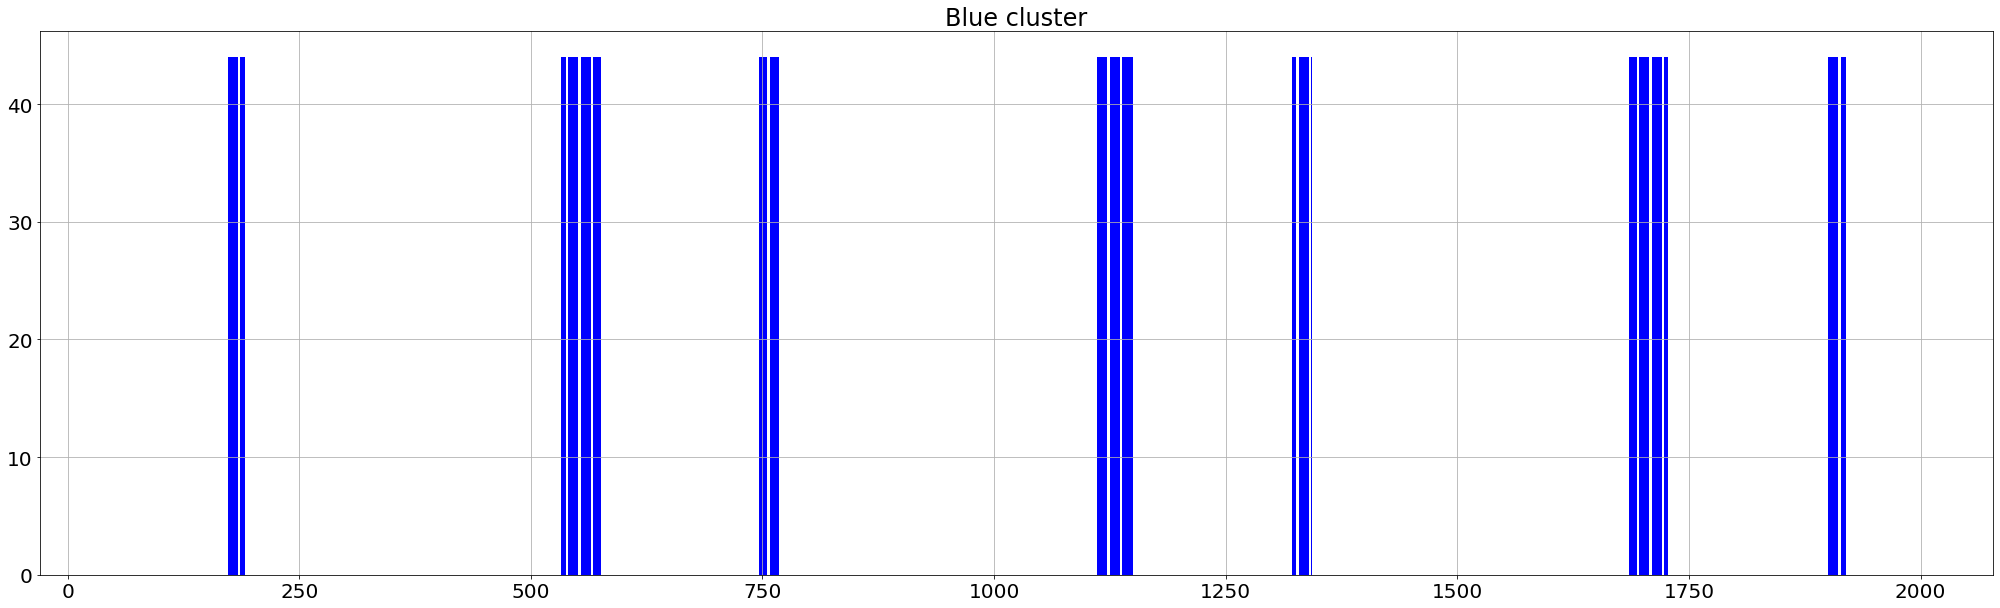

In [22]:
barData = pd.DataFrame.from_records(snB)

plt.rc('font', size=20)
plt.rcParams['figure.figsize'] = [35,10]
fig, ax = plt.subplots()

ax.set_title('Blue cluster')  
ax.bar(barData[0], barData[1], color='b')
ax.set_xlim([-30, 2078])
ax.grid()

plt.show()

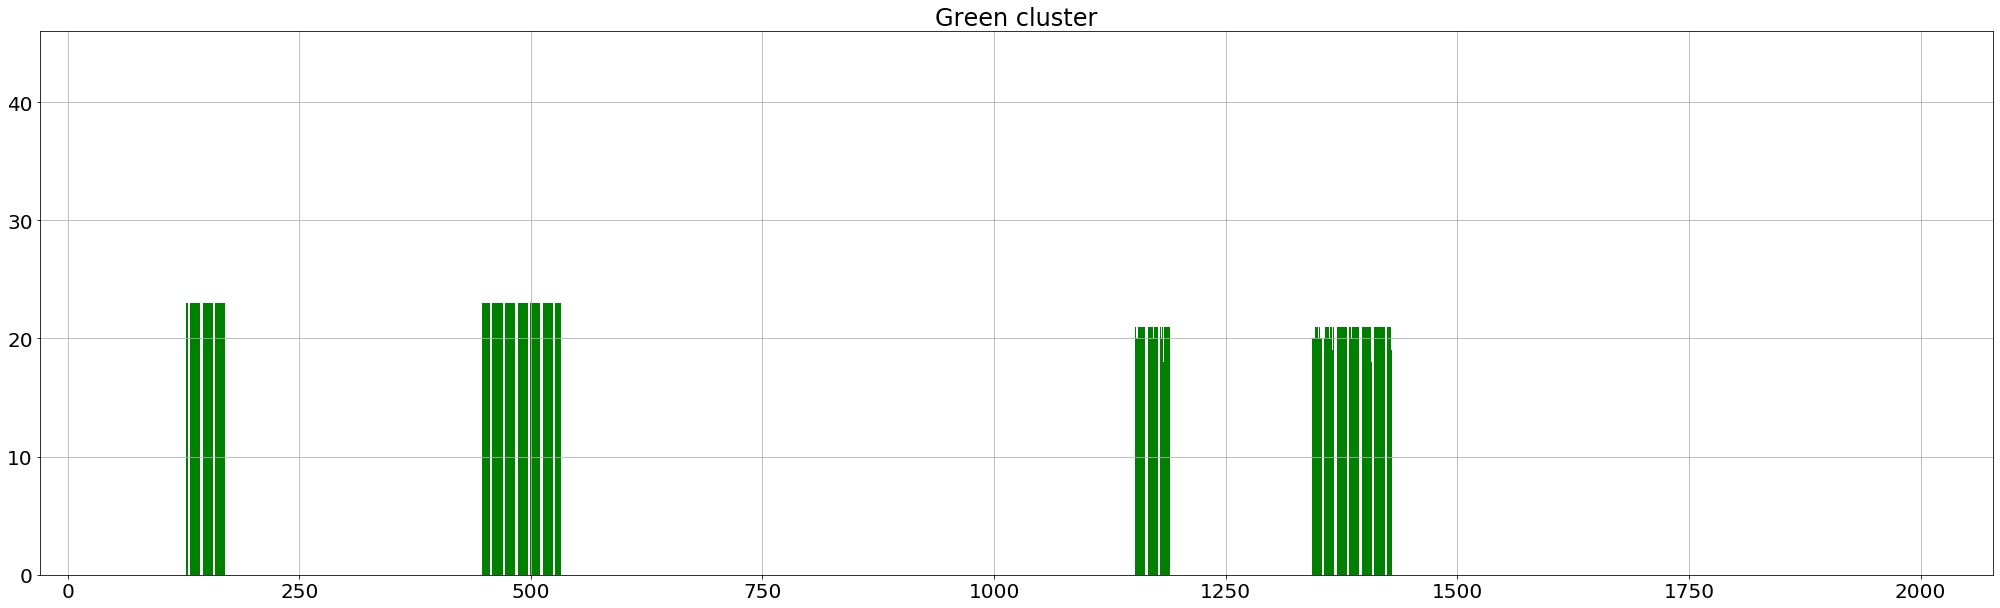

In [23]:
barData = pd.DataFrame.from_records(snG)

plt.rc('font', size=20)
plt.rcParams['figure.figsize'] = [35,10]
fig, ax = plt.subplots()

ax.set_title('Green cluster')  
ax.bar(barData[0], barData[1], color='g')
ax.set_xlim([-30, 2078])
ax.set_ylim([0,   46])
ax.grid()

plt.show()

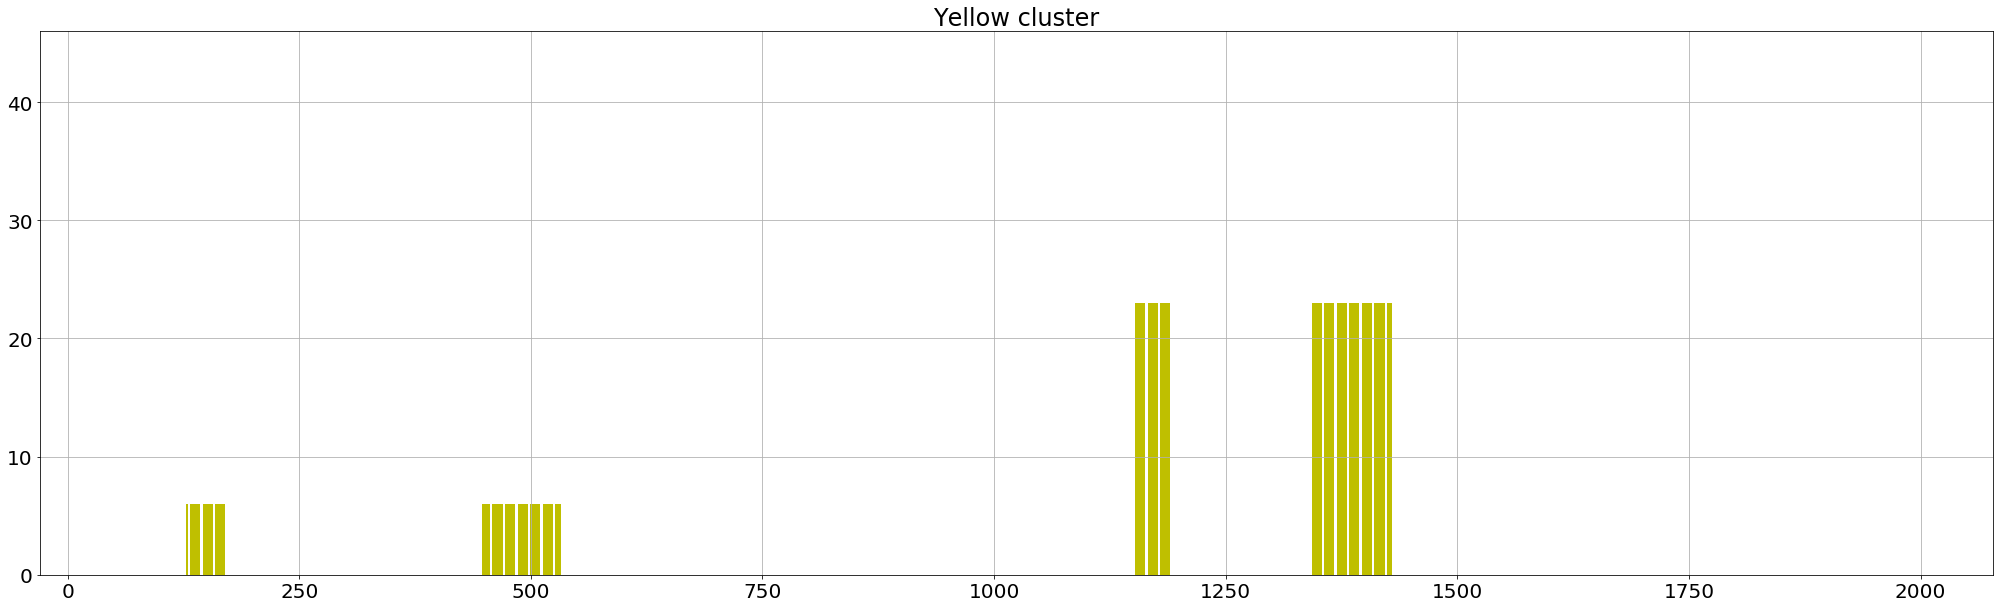

In [24]:
barData = pd.DataFrame.from_records(snY)

plt.rc('font', size=20)
plt.rcParams['figure.figsize'] = [35,10]
fig, ax = plt.subplots()

ax.set_title('Yellow cluster')  
ax.bar(barData[0], barData[1], color='y')
ax.set_xlim([-30, 2078])
ax.set_ylim([0,   46])
ax.grid()

plt.show()

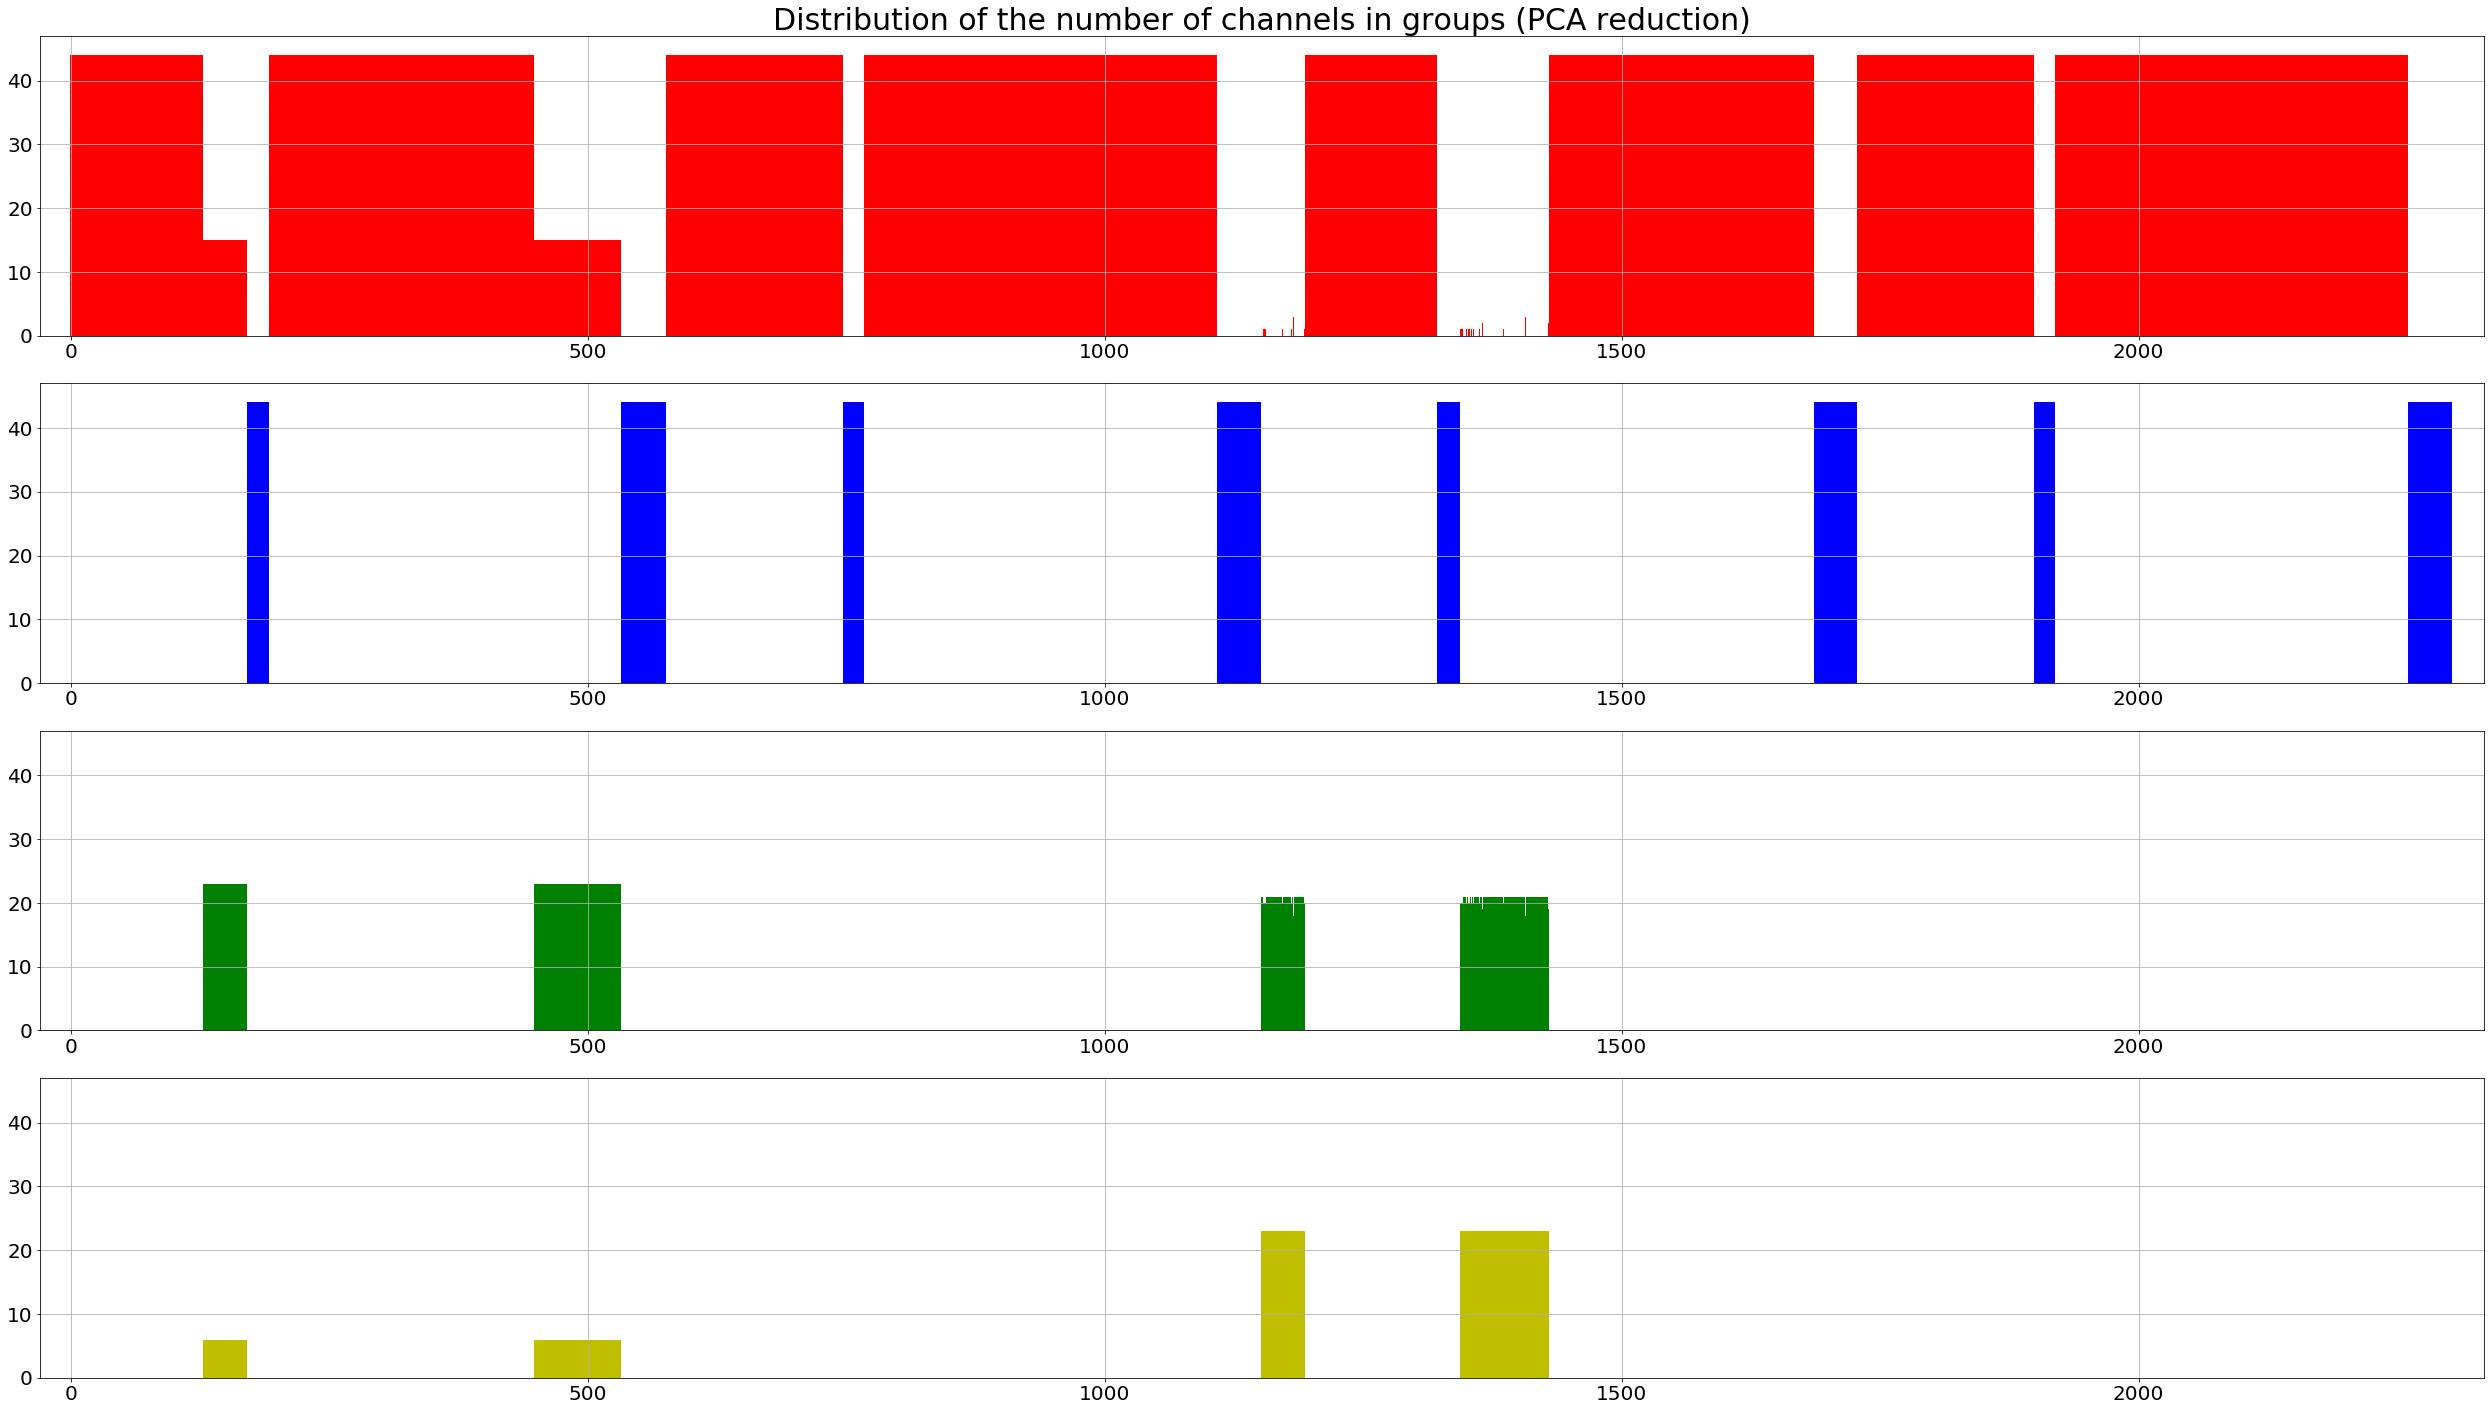

In [25]:
barDataR = pd.DataFrame.from_records(snR)
barDataG = pd.DataFrame.from_records(snG)
barDataB = pd.DataFrame.from_records(snB)
barDataY = pd.DataFrame.from_records(snY)

plt.rcParams['figure.figsize'] = [35,20]

plt.subplot(411)
plt.title("Distribution of the number of channels in groups (PCA reduction)", fontsize=30)
plt.bar(barDataR[0], barDataR[1], color='r', width=1)
plt.grid(True)
plt.xlim([-30, 2334])
plt.ylim([0, 47])

plt.subplot(412)
plt.bar(barDataB[0], barDataB[1], color='b', width=1)
plt.grid(True)
plt.xlim([-30, 2334])
plt.ylim([0, 47])

plt.subplot(413)
plt.bar(barDataG[0], barDataG[1], color='g', width=1)
plt.grid(True)
plt.xlim([-30, 2334])
plt.ylim([0, 47])

plt.subplot(414)
plt.bar(barDataY[0], barDataY[1], color='y', width=1)
plt.grid(True)
plt.xlim([-30, 2334])
plt.ylim([0, 47])

plt.tight_layout()
plt.savefig('pictures/hit_tresholds_groups_amount_Phi_modules_PCA.png')
plt.show()

# Analiza hit trasholdów dla wszystkich kalibracji w zależności od modułów

Dla każdej kalibracji oddzielnie sprawdzono, jak rozkładają się dane:
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na moduły.


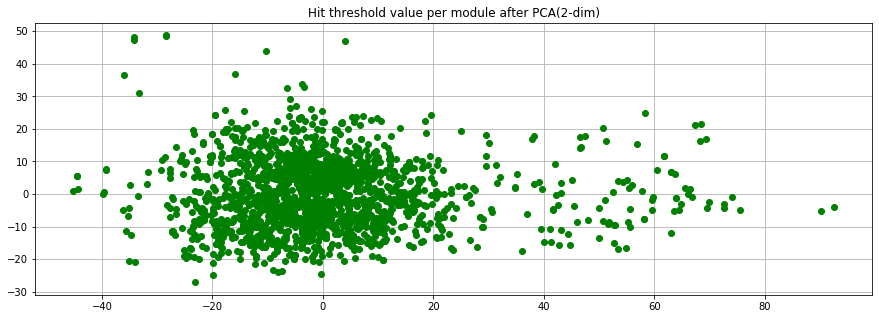

In [23]:
fig, ax = plt.subplots()
for file in data_filesT:
    #print(file)
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data.index = [i for i in range(84)]
    data = data[pd.DataFrame(data[1].tolist()).isin(r_sensors_names).any(1)]
    names = data[1].tolist()
    data2 = data.loc[:, 2:2305]

    data2.index = names
    data2.columns = range(2304)

    data_PCA = data2

    x = data_PCA.loc[:, range(2304)].values
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    #print(principalDf)

    ax.set_title('Hit threshold value per module after PCA(2-dim)')

    for i in principalDf.index:
        ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'go')

    
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()
#print(sensor_numbers)

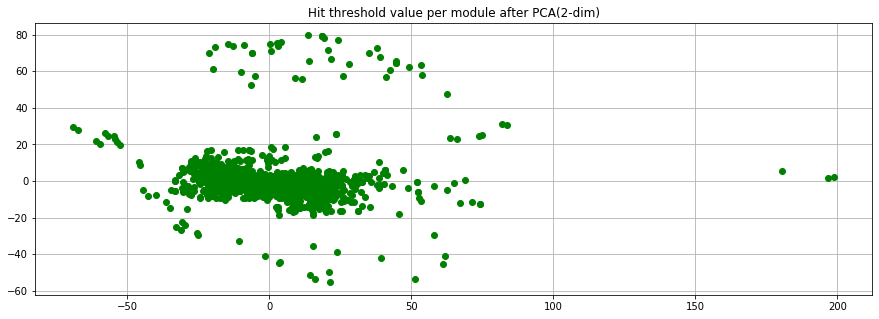

In [24]:
fig, ax = plt.subplots()
for file in data_filesT:
    #print(file)
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data.index = [i for i in range(84)]
    data = data[pd.DataFrame(data[1].tolist()).isin(phi_sensors_names).any(1)]
    names = data[1].tolist()
    data2 = data.loc[:, 2:2305]

    data2.index = names
    data2.columns = range(2304)

    data_PCA = data2

    x = data_PCA.loc[:, range(2304)].values
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    #print(principalDf)

    ax.set_title('Hit threshold value per module after PCA(2-dim)')

    for i in principalDf.index:
        ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'go')
    
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()
#print(sensor_numbers)